In [6]:
# Basic module
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
%matplotlib inline

# Machine Learning module
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Model selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Feature selection
from sklearn.feature_selection import RFE

# Evaluation method
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# 前処理済みデータ(pickle)読み込み
train = pd.read_pickle('../1. data/train_pre_proccessing_v2.pkl')
test = pd.read_pickle('../1. data/test_pre_proccessing_v2.pkl')
submit = pd.read_csv('../1. data/sample_submit.csv', header=None, names=['id','value'])

In [3]:
# データ作成
X = train.drop('mpg', axis=1)
y = train['mpg'].copy().values

In [4]:
# データ分割
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True)

In [5]:
len(X.columns)

30

----------------------------------------------

r2: 0.749
r2: 0.688
mse: 18.682


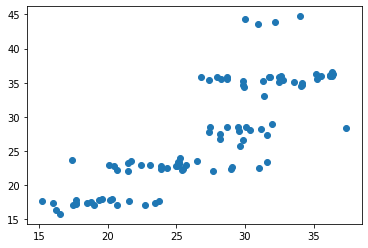

In [74]:
# Ridge regression
ridge = RidgeCV(cv=5, scoring='r2')
ridge.fit(train_X, train_y)

# 予測
y_pre = ridge.predict(test_X)

# 結果
print('r2: {:.3f}'.format(ridge.score(train_X,train_y)))
print('r2: {:.3f}'.format(ridge.score(test_X,test_y)))
print('mse: {:.3f}'.format(mean_squared_error(test_y,y_pre)))

plt.scatter(y_pre, test_y)

<BarContainer object of 30 artists>

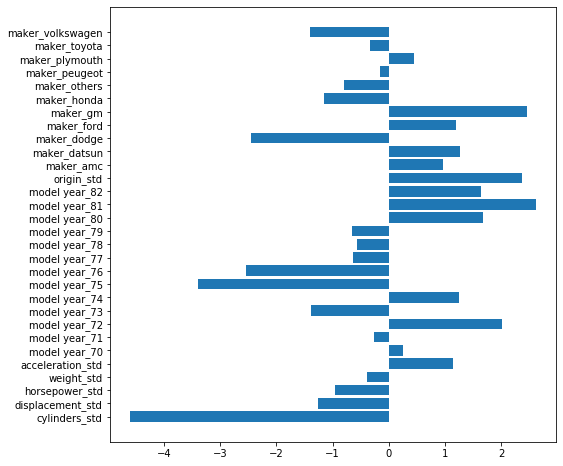

In [7]:
# 係数描画
labels = train_X.columns
height = ridge.coef_
left = np.arange(len(labels))
plt.figure(figsize=(8,8))
plt.barh(left, height, tick_label=labels)

In [22]:
# Ridgeで予測
ridge = Ridge(alpha=1.0).fit(X,y)
y_pre = ridge.predict(test)

# 提出用データ作成
submit['value'] = y_pre
submit.to_csv('submit_20201116_ridge_v1.csv',header=False, index=False)

##### Adaboost

In [46]:
# Decision tree
estimator = DecisionTreeRegressor()

# Adaboost
adaboost = AdaBoostRegressor(
                base_estimator=estimator,
                n_estimators=100,
                learning_rate=0.001
)

adaboost.fit(train_X, train_y)
y_pre = adaboost.predict(test_X)

print('score(train): {:.3f}'.format(adaboost.score(train_X, train_y)))
print('score(test): {:.3f}'.format(adaboost.score(test_X, test_y)))
print('mse(test): {:.3f}'.format(mean_squared_error(test_y, y_pre)))

score(train): 1.000
score(test): 0.791
mse(test): 10.995


In [124]:
# Decision tree
estimator = DecisionTreeRegressor(max_depth=7)

# Adaboost
adaboost = AdaBoostRegressor(
                base_estimator=estimator,
                n_estimators=100,
                learning_rate=0.05
)

adaboost.fit(X, y)
y_pre = adaboost.predict(test)

# 提出用データ作成
submit['value'] = y_pre
submit.to_csv('submit_20201116_adaboost_v1.csv',header=False, index=False)

In [47]:
# Feature selection
selector = RFE(estimator=Ridge())
selector.fit(train_X, train_y)

RFE(estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
                    normalize=False, random_state=None, solver='auto',
                    tol=0.001),
    n_features_to_select=None, step=1, verbose=0)

In [48]:
# Ranking
selector.ranking_

array([ 1, 13,  6, 15,  1, 16, 10,  1,  5,  1,  1,  1,  8, 14, 11,  1,  1,
        1,  1,  1,  4,  1,  2,  1,  1, 12,  7,  3,  9,  1])

In [49]:
# select_columns
select_columns = train_X.columns[selector.support_]
train_X_selected = train_X[select_columns]
train_X_selected

,cylinders_std,acceleration_std,model year_72,model year_74,model year_75,model year_76,model year_80,model year_81,model year_82,origin_std,maker_amc,maker_dodge,maker_gm,maker_honda,maker_volkswagen
41,0.0,1.053625,0,0,0,0,0,1,0,1.0,0,0,0,0,0
86,0.0,0.034306,0,0,0,0,0,1,0,0.0,0,0,1,0,0
440,1.0,-0.954493,0,0,0,0,0,0,0,0.0,0,0,0,0,0
446,0.0,-0.158190,0,0,0,0,0,1,0,1.0,0,0,0,0,0
493,1.0,-1.028562,0,0,0,0,0,0,0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0.0,-0.731592,0,0,0,0,0,0,1,0.5,0,0,0,0,0
202,0.5,-0.907916,0,0,0,0,0,0,0,0.0,0,0,0,0,1
264,0.0,0.127472,0,0,0,0,0,0,0,1.0,0,0,0,0,0
89,0.5,-0.877722,0,0,0,1,0,0,0,1.0,0,0,0,0,0


■ Xgboost

##### ■ Random Forest

In [11]:
# regressorインスタンス生成
rf = RandomForestRegressor(criterion='mse', n_jobs=4)

# parameter setting
param_grid = {
    'n_estimators': [10, 20, 30, 50, 100, 200, 300],
    'max_depth': [3, 5, 10, 15, 20, 30],
    'min_samples_leaf': [5, 10, 15, 20, 30]
}

# Gridsearch
gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
gs.fit(train_X, train_y)



# # 学習＆予測
# rf.fit(train_X, train_y)
# y_pre = rf.predict(test_X)

# print('r2: {:.3f}'.format(rf.score(test_X,test_y)))
# print('mse: {:.3f}'.format(mean_squared_error(test_y, y_pre)))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=4,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 10, 15, 20, 30

In [14]:
# Save the model
model_name = 'random_forest_gridsearch.pkl'
with open(model_name, 'wb') as fp:
    pickle.dump(gs, fp)

In [16]:
# Load to model
model_name = 'random_forest_gridsearch.pkl'
with open(model_name, 'rb') as fp:
    gs_rf = pickle.load(fp)

gs_rf.best_score_

0.7782901862848224

r2: 0.874
r2: 0.787
mse: 12.763


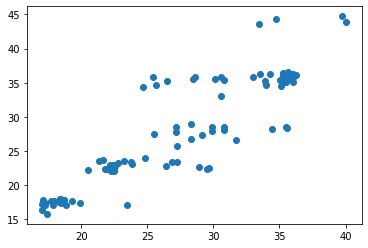

In [75]:
# ベストパラメータで予測
y_pre = gs_rf.predict(test_X)
print('r2: {:.3f}'.format(gs_rf.score(train_X,train_y)))
print('r2: {:.3f}'.format(gs_rf.score(test_X,test_y)))
print('mse: {:.3f}'.format(mean_squared_error(test_y,y_pre)))
gs_rf.best_params_

plt.scatter(y_pre, test_y)

In [21]:
# RandomForest
rf = RandomForestRegressor(
            n_estimators=10,
            max_depth=15,
            min_samples_leaf=5
)

rf.fit(X,y)
y_pre = rf.predict(test)

print(rf.feature_importances_)

# 提出用データ作成
submit['value'] = y_pre
submit.to_csv('submit_20201116_randomforest_v1.csv',header=False, index=False)

[6.37714528e-01 3.30233674e-02 8.61432124e-02 4.34011420e-02
 1.04367742e-01 5.97771740e-04 4.44766723e-03 0.00000000e+00
 3.26004061e-04 2.90499425e-04 2.86660346e-04 1.69971160e-05
 1.77664672e-04 4.84354424e-03 9.21592842e-06 5.48068106e-03
 8.02330685e-05 8.58966223e-03 3.66226770e-02 5.23589976e-04
 1.74719122e-03 7.70814323e-05 1.30045130e-03 2.00991323e-02
 6.80146266e-06 9.81474201e-03 7.35672437e-06 4.21594687e-06
 0.00000000e+00 1.67767996e-07]


<BarContainer object of 30 artists>

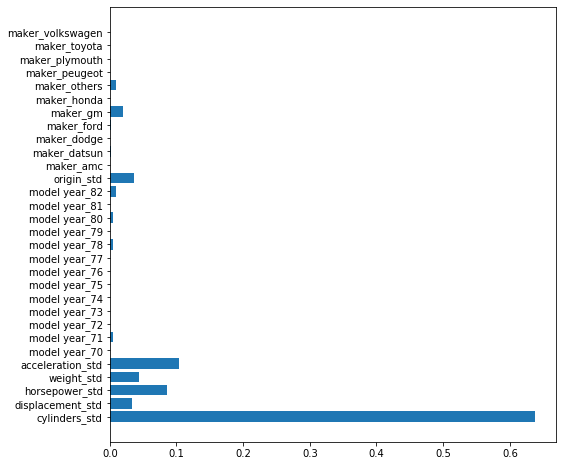

In [36]:
# 重要度描画
# 係数描画
labels = X.columns
height = rf.feature_importances_
left = np.arange(len(labels))
plt.figure(figsize=(8,8))
plt.barh(left, height, tick_label=labels)

In [40]:
# 重要度順に並べ変え
sort_ind = np.argsort(rf.feature_importances_)[::-1]

for i in sort_ind:
    print(X.columns[i], rf.feature_importances_[i])

cylinders_std 0.6377145276386413
acceleration_std 0.10436774225265133
horsepower_std 0.08614321243802378
weight_std 0.043401142046790665
origin_std 0.03662267701672735
displacement_std 0.03302336740636932
maker_gm 0.020099132252286912
maker_others 0.009814742013803451
model year_82 0.00858966222849107
model year_80 0.005480681055995407
model year_78 0.004843544235603231
model year_71 0.004447667229765502
maker_datsun 0.0017471912153296364
maker_ford 0.001300451302974614
model year_70 0.0005977717397721957
maker_amc 0.0005235899755346771
model year_73 0.0003260040609539588
model year_74 0.00029049942472084654
model year_75 0.00028666034616451523
model year_77 0.0001776646722820237
model year_81 8.023306851029313e-05
maker_dodge 7.708143228984458e-05
model year_76 1.6997116004845917e-05
model year_79 9.21592842124276e-06
maker_peugeot 7.356724366108559e-06
maker_honda 6.801462656633858e-06
maker_plymouth 4.215946872801897e-06
maker_volkswagen 1.677679961755167e-07
model year_72 0.0
maker

In [43]:
# 上位7位の説明変数を取得
index = sort_ind[:7]
select_columns = X.columns[index]
select_columns

Index(['cylinders_std', 'acceleration_std', 'horsepower_std', 'weight_std',
       'origin_std', 'displacement_std', 'maker_gm'],
      dtype='object')

In [44]:
X_selected = X[select_columns]
X_selected

,cylinders_std,acceleration_std,horsepower_std,weight_std,origin_std,displacement_std,maker_gm
0,0.5,1.245371,0.088708,0.110249,0.0,-0.515790,0
1,1.0,-0.775800,1.213452,2.415576,0.0,1.462149,0
2,1.0,-0.913758,0.932266,0.052651,0.0,1.010049,0
3,0.5,-0.014120,-0.614257,-0.767770,0.0,1.933087,1
4,1.0,-2.538935,3.181752,-0.690504,0.0,2.206231,0
...,...,...,...,...,...,...,...
495,0.0,-0.792539,1.157214,0.138346,0.0,-0.515790,0
496,0.0,1.048480,-1.120391,-0.705957,1.0,-0.920797,0
497,1.0,-0.022811,3.181752,0.052651,0.0,1.010049,0
498,0.0,-0.861787,1.213452,-0.852060,0.0,-0.920797,0


In [47]:
# データ分割
train_X2, test_X2, train_y2, test_y2 = train_test_split(X_selected, y, test_size=0.2, shuffle=True)

##### 混合

In [ ]:
# Suppoet Vector Regression
svr = SVR(kernel = "rbf", gamma = 'scale', C=500, epsilon=0.05).fit(train_X, train_y)

##### Support Vector Regressor

予測精度(train):0.980
予測精度(test):0.720
予測精度(test):16.810


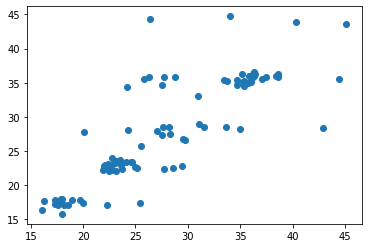

In [96]:
# Suppoet Vector Regression
svr = SVR(kernel = "rbf", gamma = 'scale', C=500, epsilon=0.05).fit(train_X, train_y)

# predict
y_pre_l = svr.predict(train_X)
y_pre_t = svr.predict(test_X)

# evaluation
print('予測精度(train):{:.3f}'.format(svr.score(train_X, train_y)))
print('予測精度(test):{:.3f}'.format(svr.score(test_X, test_y)))
print('予測精度(test):{:.3f}'.format(mean_squared_error(test_y, y_pre_t)))

plt.scatter(y_pre_t, test_y)

In [55]:
# Gridsearch
params = {
    "C":[1.0, 10, 100, 1000], 
    "epsilon": [0.1, 1.0, 5.0, 10], 
    'gamma': [1.0, 0.1, 0.01, 0.001, 0.0001]
}

gs = GridSearchCV(estimator=SVR(kernel='rbf'), param_grid=params, cv=5, scoring='r2')
gs.fit(train_X, train_y)

C:\Users\tatsu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1.0, 10, 100, 1000],
                         'epsilon': [0.1, 1.0, 5.0, 10],
                         'gamma': [1.0, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [56]:
# best_score_
print('best r2:', gs.best_score_)

# best params
print('best params:', gs.best_params_)

best r2: 0.7558654750705179
best params: {'C': 10, 'epsilon': 0.1, 'gamma': 0.1}


In [57]:
# 提出用
regr = SVR(kernel='rbf', C=gs.best_params_['C'], epsilon=gs.best_params_['epsilon'], gamma=gs.best_params_['gamma']).fit(X, y)
y_pre = regr.predict(test)

# 提出用データ作成
submit['value'] = y_pre
submit.to_csv('submit_20201116_svr_v1.csv',header=False, index=False)

------------------------------------------------------------------------------------

In [58]:
# NeuralNetwork
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam

In [70]:
# モデルの設定
model = Sequential()
model.add(Dense(units=100, input_dim=train_X.shape[1], activation='sigmoid'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1))

# モデル作成
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mse'])

model.fit(train_X, train_y, 
          epochs=10000, 
          batch_size=200,
          validation_data=(test_X, test_y)
)

Train on 392 samples, validate on 99 samples
Epoch 1/10000
392/392 [==============================] - 1s 3ms/step - loss: 741.7605 - mean_squared_error: 741.7605 - val_loss: 781.8708 - val_mean_squared_error: 781.8708
Epoch 2/10000
392/392 [==============================] - 0s 31us/step - loss: 722.7415 - mean_squared_error: 722.7415 - val_loss: 763.4471 - val_mean_squared_error: 763.4471
Epoch 3/10000
392/392 [==============================] - 0s 31us/step - loss: 705.2447 - mean_squared_error: 705.2447 - val_loss: 746.0891 - val_mean_squared_error: 746.0891
Epoch 4/10000
392/392 [==============================] - 0s 31us/step - loss: 688.6575 - mean_squared_error: 688.6575 - val_loss: 729.0369 - val_mean_squared_error: 729.0369
Epoch 5/10000
392/392 [==============================] - 0s 34us/step - loss: 672.2428 - mean_squared_error: 672.2428 - val_loss: 712.2991 - val_mean_squared_error: 712.2991
Epoch 6/10000
392/392 [==============================] - 0s 36us/step - loss: 656.1231

Epoch 95/10000
392/392 [==============================] - 0s 35us/step - loss: 23.5208 - mean_squared_error: 23.5208 - val_loss: 37.1787 - val_mean_squared_error: 37.1787
Epoch 96/10000
392/392 [==============================] - 0s 38us/step - loss: 23.3795 - mean_squared_error: 23.3795 - val_loss: 37.0042 - val_mean_squared_error: 37.0042
Epoch 97/10000
392/392 [==============================] - 0s 39us/step - loss: 23.2358 - mean_squared_error: 23.2358 - val_loss: 36.8299 - val_mean_squared_error: 36.8299
Epoch 98/10000
392/392 [==============================] - 0s 36us/step - loss: 23.0997 - mean_squared_error: 23.0997 - val_loss: 36.6607 - val_mean_squared_error: 36.6607
Epoch 99/10000
392/392 [==============================] - 0s 37us/step - loss: 22.9634 - mean_squared_error: 22.9634 - val_loss: 36.4876 - val_mean_squared_error: 36.4876
Epoch 100/10000
392/392 [==============================] - 0s 41us/step - loss: 22.8300 - mean_squared_error: 22.8300 - val_loss: 36.3163 - val_m

Epoch 190/10000
392/392 [==============================] - 0s 28us/step - loss: 15.8460 - mean_squared_error: 15.8460 - val_loss: 25.3829 - val_mean_squared_error: 25.3829
Epoch 191/10000
392/392 [==============================] - 0s 26us/step - loss: 15.8060 - mean_squared_error: 15.8060 - val_loss: 25.3086 - val_mean_squared_error: 25.3086
Epoch 192/10000
392/392 [==============================] - 0s 34us/step - loss: 15.7649 - mean_squared_error: 15.7649 - val_loss: 25.2344 - val_mean_squared_error: 25.2344
Epoch 193/10000
392/392 [==============================] - 0s 38us/step - loss: 15.7304 - mean_squared_error: 15.7304 - val_loss: 25.1563 - val_mean_squared_error: 25.1563
Epoch 194/10000
392/392 [==============================] - 0s 41us/step - loss: 15.6883 - mean_squared_error: 15.6883 - val_loss: 25.0837 - val_mean_squared_error: 25.0837
Epoch 195/10000
392/392 [==============================] - 0s 37us/step - loss: 15.6507 - mean_squared_error: 15.6507 - val_loss: 25.0101 - 

392/392 [==============================] - 0s 28us/step - loss: 13.5252 - mean_squared_error: 13.5252 - val_loss: 20.7768 - val_mean_squared_error: 20.7768
Epoch 285/10000
392/392 [==============================] - 0s 36us/step - loss: 13.5118 - mean_squared_error: 13.5118 - val_loss: 20.7469 - val_mean_squared_error: 20.7469
Epoch 286/10000
392/392 [==============================] - 0s 36us/step - loss: 13.4996 - mean_squared_error: 13.4996 - val_loss: 20.7137 - val_mean_squared_error: 20.7137
Epoch 287/10000
392/392 [==============================] - 0s 33us/step - loss: 13.4868 - mean_squared_error: 13.4868 - val_loss: 20.6848 - val_mean_squared_error: 20.6848
Epoch 288/10000
392/392 [==============================] - 0s 38us/step - loss: 13.4734 - mean_squared_error: 13.4734 - val_loss: 20.6582 - val_mean_squared_error: 20.6582
Epoch 289/10000
392/392 [==============================] - 0s 38us/step - loss: 13.4592 - mean_squared_error: 13.4592 - val_loss: 20.6332 - val_mean_squared

392/392 [==============================] - 0s 33us/step - loss: 12.6929 - mean_squared_error: 12.6929 - val_loss: 18.7957 - val_mean_squared_error: 18.7957
Epoch 379/10000
392/392 [==============================] - 0s 36us/step - loss: 12.6875 - mean_squared_error: 12.6875 - val_loss: 18.7822 - val_mean_squared_error: 18.7822
Epoch 380/10000
392/392 [==============================] - 0s 36us/step - loss: 12.6815 - mean_squared_error: 12.6815 - val_loss: 18.7651 - val_mean_squared_error: 18.7651
Epoch 381/10000
392/392 [==============================] - 0s 31us/step - loss: 12.6769 - mean_squared_error: 12.6769 - val_loss: 18.7471 - val_mean_squared_error: 18.7471
Epoch 382/10000
392/392 [==============================] - 0s 41us/step - loss: 12.6703 - mean_squared_error: 12.6703 - val_loss: 18.7329 - val_mean_squared_error: 18.7329
Epoch 383/10000
392/392 [==============================] - 0s 36us/step - loss: 12.6651 - mean_squared_error: 12.6651 - val_loss: 18.7232 - val_mean_squared

Epoch 426/10000
392/392 [==============================] - 0s 41us/step - loss: 12.4642 - mean_squared_error: 12.4642 - val_loss: 18.2092 - val_mean_squared_error: 18.2092
Epoch 427/10000
392/392 [==============================] - 0s 38us/step - loss: 12.4618 - mean_squared_error: 12.4618 - val_loss: 18.1992 - val_mean_squared_error: 18.1992
Epoch 428/10000
392/392 [==============================] - 0s 33us/step - loss: 12.4561 - mean_squared_error: 12.4561 - val_loss: 18.1864 - val_mean_squared_error: 18.1864
Epoch 429/10000
392/392 [==============================] - 0s 37us/step - loss: 12.4527 - mean_squared_error: 12.4527 - val_loss: 18.1762 - val_mean_squared_error: 18.1762
Epoch 430/10000
392/392 [==============================] - 0s 34us/step - loss: 12.4490 - mean_squared_error: 12.4490 - val_loss: 18.1650 - val_mean_squared_error: 18.1650
Epoch 431/10000
392/392 [==============================] - 0s 41us/step - loss: 12.4458 - mean_squared_error: 12.4458 - val_loss: 18.1546 - 

Epoch 521/10000
392/392 [==============================] - 0s 36us/step - loss: 12.1798 - mean_squared_error: 12.1798 - val_loss: 17.4798 - val_mean_squared_error: 17.4798
Epoch 522/10000
392/392 [==============================] - 0s 28us/step - loss: 12.1756 - mean_squared_error: 12.1756 - val_loss: 17.4779 - val_mean_squared_error: 17.4779
Epoch 523/10000
392/392 [==============================] - 0s 31us/step - loss: 12.1730 - mean_squared_error: 12.1730 - val_loss: 17.4727 - val_mean_squared_error: 17.4727
Epoch 524/10000
392/392 [==============================] - 0s 31us/step - loss: 12.1714 - mean_squared_error: 12.1714 - val_loss: 17.4652 - val_mean_squared_error: 17.4652
Epoch 525/10000
392/392 [==============================] - 0s 44us/step - loss: 12.1685 - mean_squared_error: 12.1685 - val_loss: 17.4589 - val_mean_squared_error: 17.4589
Epoch 526/10000
392/392 [==============================] - 0s 44us/step - loss: 12.1665 - mean_squared_error: 12.1665 - val_loss: 17.4509 - 

Epoch 616/10000
392/392 [==============================] - 0s 43us/step - loss: 11.8785 - mean_squared_error: 11.8785 - val_loss: 17.1396 - val_mean_squared_error: 17.1396
Epoch 617/10000
392/392 [==============================] - 0s 36us/step - loss: 11.8724 - mean_squared_error: 11.8724 - val_loss: 17.1374 - val_mean_squared_error: 17.1374
Epoch 618/10000
392/392 [==============================] - 0s 36us/step - loss: 11.8680 - mean_squared_error: 11.8680 - val_loss: 17.1339 - val_mean_squared_error: 17.1339
Epoch 619/10000
392/392 [==============================] - 0s 38us/step - loss: 11.8632 - mean_squared_error: 11.8632 - val_loss: 17.1332 - val_mean_squared_error: 17.1332
Epoch 620/10000
392/392 [==============================] - 0s 36us/step - loss: 11.8599 - mean_squared_error: 11.8599 - val_loss: 17.1348 - val_mean_squared_error: 17.1348
Epoch 621/10000
392/392 [==============================] - 0s 35us/step - loss: 11.8552 - mean_squared_error: 11.8552 - val_loss: 17.1371 - 

392/392 [==============================] - 0s 36us/step - loss: 11.3659 - mean_squared_error: 11.3659 - val_loss: 17.0244 - val_mean_squared_error: 17.0244
Epoch 711/10000
392/392 [==============================] - 0s 31us/step - loss: 11.3604 - mean_squared_error: 11.3604 - val_loss: 17.0181 - val_mean_squared_error: 17.0181
Epoch 712/10000
392/392 [==============================] - 0s 37us/step - loss: 11.3569 - mean_squared_error: 11.3569 - val_loss: 17.0188 - val_mean_squared_error: 17.0188
Epoch 713/10000
392/392 [==============================] - 0s 38us/step - loss: 11.3492 - mean_squared_error: 11.3492 - val_loss: 17.0274 - val_mean_squared_error: 17.0274
Epoch 714/10000
392/392 [==============================] - 0s 41us/step - loss: 11.3404 - mean_squared_error: 11.3404 - val_loss: 17.0292 - val_mean_squared_error: 17.0292
Epoch 715/10000
392/392 [==============================] - 0s 36us/step - loss: 11.3364 - mean_squared_error: 11.3364 - val_loss: 17.0321 - val_mean_squared

Epoch 757/10000
392/392 [==============================] - 0s 33us/step - loss: 11.0550 - mean_squared_error: 11.0550 - val_loss: 16.9975 - val_mean_squared_error: 16.9975
Epoch 758/10000
392/392 [==============================] - 0s 33us/step - loss: 11.0480 - mean_squared_error: 11.0480 - val_loss: 16.9970 - val_mean_squared_error: 16.9970
Epoch 759/10000
392/392 [==============================] - 0s 36us/step - loss: 11.0461 - mean_squared_error: 11.0461 - val_loss: 17.0001 - val_mean_squared_error: 17.0001
Epoch 760/10000
392/392 [==============================] - 0s 41us/step - loss: 11.0386 - mean_squared_error: 11.0386 - val_loss: 17.0025 - val_mean_squared_error: 17.0025
Epoch 761/10000
392/392 [==============================] - 0s 36us/step - loss: 11.0321 - mean_squared_error: 11.0321 - val_loss: 16.9921 - val_mean_squared_error: 16.9921
Epoch 762/10000
392/392 [==============================] - 0s 40us/step - loss: 11.0243 - mean_squared_error: 11.0243 - val_loss: 16.9853 - 

392/392 [==============================] - 0s 38us/step - loss: 10.4647 - mean_squared_error: 10.4647 - val_loss: 16.9710 - val_mean_squared_error: 16.9710
Epoch 852/10000
392/392 [==============================] - 0s 38us/step - loss: 10.4593 - mean_squared_error: 10.4593 - val_loss: 16.9731 - val_mean_squared_error: 16.9731
Epoch 853/10000
392/392 [==============================] - 0s 36us/step - loss: 10.4522 - mean_squared_error: 10.4522 - val_loss: 16.9736 - val_mean_squared_error: 16.9736
Epoch 854/10000
392/392 [==============================] - 0s 36us/step - loss: 10.4469 - mean_squared_error: 10.4469 - val_loss: 16.9749 - val_mean_squared_error: 16.9749
Epoch 855/10000
392/392 [==============================] - 0s 38us/step - loss: 10.4440 - mean_squared_error: 10.4440 - val_loss: 16.9675 - val_mean_squared_error: 16.9675
Epoch 856/10000
392/392 [==============================] - 0s 41us/step - loss: 10.4369 - mean_squared_error: 10.4369 - val_loss: 16.9696 - val_mean_squared

Epoch 899/10000
392/392 [==============================] - 0s 38us/step - loss: 10.2341 - mean_squared_error: 10.2341 - val_loss: 16.9656 - val_mean_squared_error: 16.9656
Epoch 900/10000
392/392 [==============================] - 0s 38us/step - loss: 10.2276 - mean_squared_error: 10.2276 - val_loss: 16.9554 - val_mean_squared_error: 16.9554
Epoch 901/10000
392/392 [==============================] - 0s 36us/step - loss: 10.2230 - mean_squared_error: 10.2230 - val_loss: 16.9556 - val_mean_squared_error: 16.9556
Epoch 902/10000
392/392 [==============================] - 0s 43us/step - loss: 10.2211 - mean_squared_error: 10.2211 - val_loss: 16.9507 - val_mean_squared_error: 16.9507
Epoch 903/10000
392/392 [==============================] - ETA: 0s - loss: 10.0494 - mean_squared_error: 10.04 - 0s 45us/step - loss: 10.2152 - mean_squared_error: 10.2152 - val_loss: 16.9560 - val_mean_squared_error: 16.9560
Epoch 904/10000
392/392 [==============================] - 0s 38us/step - loss: 10.212

392/392 [==============================] - 0s 36us/step - loss: 9.9248 - mean_squared_error: 9.9248 - val_loss: 17.0408 - val_mean_squared_error: 17.0408
Epoch 995/10000
392/392 [==============================] - 0s 29us/step - loss: 9.9250 - mean_squared_error: 9.9250 - val_loss: 17.0405 - val_mean_squared_error: 17.0405
Epoch 996/10000
392/392 [==============================] - 0s 40us/step - loss: 9.9203 - mean_squared_error: 9.9203 - val_loss: 17.0394 - val_mean_squared_error: 17.0394
Epoch 997/10000
392/392 [==============================] - 0s 33us/step - loss: 9.9177 - mean_squared_error: 9.9177 - val_loss: 17.0497 - val_mean_squared_error: 17.0497
Epoch 998/10000
392/392 [==============================] - 0s 38us/step - loss: 9.9157 - mean_squared_error: 9.9157 - val_loss: 17.0566 - val_mean_squared_error: 17.0566
Epoch 999/10000
392/392 [==============================] - 0s 38us/step - loss: 9.9131 - mean_squared_error: 9.9131 - val_loss: 17.0573 - val_mean_squared_error: 17.0

392/392 [==============================] - 0s 32us/step - loss: 9.8211 - mean_squared_error: 9.8211 - val_loss: 17.0608 - val_mean_squared_error: 17.0608
Epoch 1043/10000
392/392 [==============================] - 0s 38us/step - loss: 9.8178 - mean_squared_error: 9.8178 - val_loss: 17.0571 - val_mean_squared_error: 17.0571
Epoch 1044/10000
392/392 [==============================] - 0s 33us/step - loss: 9.8177 - mean_squared_error: 9.8177 - val_loss: 17.0593 - val_mean_squared_error: 17.0593
Epoch 1045/10000
392/392 [==============================] - 0s 43us/step - loss: 9.8157 - mean_squared_error: 9.8157 - val_loss: 17.0643 - val_mean_squared_error: 17.0643
Epoch 1046/10000
392/392 [==============================] - 0s 38us/step - loss: 9.8110 - mean_squared_error: 9.8110 - val_loss: 17.0633 - val_mean_squared_error: 17.0633
Epoch 1047/10000
392/392 [==============================] - 0s 38us/step - loss: 9.8146 - mean_squared_error: 9.8146 - val_loss: 17.0660 - val_mean_squared_error:

392/392 [==============================] - 0s 36us/step - loss: 9.7307 - mean_squared_error: 9.7307 - val_loss: 17.0642 - val_mean_squared_error: 17.0642
Epoch 1091/10000
392/392 [==============================] - 0s 36us/step - loss: 9.7310 - mean_squared_error: 9.7310 - val_loss: 17.0727 - val_mean_squared_error: 17.0727
Epoch 1092/10000
392/392 [==============================] - 0s 36us/step - loss: 9.7283 - mean_squared_error: 9.7283 - val_loss: 17.0655 - val_mean_squared_error: 17.0655
Epoch 1093/10000
392/392 [==============================] - 0s 36us/step - loss: 9.7291 - mean_squared_error: 9.7291 - val_loss: 17.0651 - val_mean_squared_error: 17.0651
Epoch 1094/10000
392/392 [==============================] - 0s 38us/step - loss: 9.7249 - mean_squared_error: 9.7249 - val_loss: 17.0655 - val_mean_squared_error: 17.0655
Epoch 1095/10000
392/392 [==============================] - 0s 33us/step - loss: 9.7245 - mean_squared_error: 9.7245 - val_loss: 17.0625 - val_mean_squared_error:

Epoch 1138/10000
392/392 [==============================] - 0s 31us/step - loss: 9.6528 - mean_squared_error: 9.6528 - val_loss: 17.0952 - val_mean_squared_error: 17.0952
Epoch 1139/10000
392/392 [==============================] - 0s 36us/step - loss: 9.6509 - mean_squared_error: 9.6509 - val_loss: 17.0976 - val_mean_squared_error: 17.0976
Epoch 1140/10000
392/392 [==============================] - 0s 35us/step - loss: 9.6496 - mean_squared_error: 9.6496 - val_loss: 17.0977 - val_mean_squared_error: 17.0977
Epoch 1141/10000
392/392 [==============================] - 0s 39us/step - loss: 9.6482 - mean_squared_error: 9.6482 - val_loss: 17.0970 - val_mean_squared_error: 17.0970
Epoch 1142/10000
392/392 [==============================] - 0s 36us/step - loss: 9.6475 - mean_squared_error: 9.6475 - val_loss: 17.1027 - val_mean_squared_error: 17.1027
Epoch 1143/10000
392/392 [==============================] - 0s 38us/step - loss: 9.6454 - mean_squared_error: 9.6454 - val_loss: 17.1012 - val_me

Epoch 1186/10000
392/392 [==============================] - 0s 30us/step - loss: 9.5817 - mean_squared_error: 9.5817 - val_loss: 17.1068 - val_mean_squared_error: 17.1068
Epoch 1187/10000
392/392 [==============================] - 0s 41us/step - loss: 9.5810 - mean_squared_error: 9.5810 - val_loss: 17.1129 - val_mean_squared_error: 17.1129
Epoch 1188/10000
392/392 [==============================] - 0s 36us/step - loss: 9.5768 - mean_squared_error: 9.5768 - val_loss: 17.1099 - val_mean_squared_error: 17.1099
Epoch 1189/10000
392/392 [==============================] - 0s 33us/step - loss: 9.5762 - mean_squared_error: 9.5762 - val_loss: 17.1028 - val_mean_squared_error: 17.1028
Epoch 1190/10000
392/392 [==============================] - 0s 36us/step - loss: 9.5758 - mean_squared_error: 9.5758 - val_loss: 17.0976 - val_mean_squared_error: 17.0976
Epoch 1191/10000
392/392 [==============================] - 0s 35us/step - loss: 9.5725 - mean_squared_error: 9.5725 - val_loss: 17.0945 - val_me

Epoch 1234/10000
392/392 [==============================] - 0s 35us/step - loss: 9.5089 - mean_squared_error: 9.5089 - val_loss: 17.0754 - val_mean_squared_error: 17.0754
Epoch 1235/10000
392/392 [==============================] - 0s 53us/step - loss: 9.5072 - mean_squared_error: 9.5072 - val_loss: 17.0760 - val_mean_squared_error: 17.0760
Epoch 1236/10000
392/392 [==============================] - 0s 43us/step - loss: 9.5055 - mean_squared_error: 9.5055 - val_loss: 17.0729 - val_mean_squared_error: 17.0729
Epoch 1237/10000
392/392 [==============================] - 0s 33us/step - loss: 9.5039 - mean_squared_error: 9.5039 - val_loss: 17.0757 - val_mean_squared_error: 17.0757
Epoch 1238/10000
392/392 [==============================] - 0s 41us/step - loss: 9.5056 - mean_squared_error: 9.5056 - val_loss: 17.0866 - val_mean_squared_error: 17.0866
Epoch 1239/10000
392/392 [==============================] - 0s 40us/step - loss: 9.5030 - mean_squared_error: 9.5030 - val_loss: 17.0848 - val_me

Epoch 1329/10000
392/392 [==============================] - 0s 38us/step - loss: 9.3476 - mean_squared_error: 9.3476 - val_loss: 16.9863 - val_mean_squared_error: 16.9863
Epoch 1330/10000
392/392 [==============================] - 0s 32us/step - loss: 9.3436 - mean_squared_error: 9.3436 - val_loss: 16.9961 - val_mean_squared_error: 16.9961
Epoch 1331/10000
392/392 [==============================] - ETA: 0s - loss: 10.4549 - mean_squared_error: 10.45 - 0s 33us/step - loss: 9.3399 - mean_squared_error: 9.3399 - val_loss: 16.9938 - val_mean_squared_error: 16.9938
Epoch 1332/10000
392/392 [==============================] - 0s 48us/step - loss: 9.3344 - mean_squared_error: 9.3344 - val_loss: 16.9951 - val_mean_squared_error: 16.9951
Epoch 1333/10000
392/392 [==============================] - 0s 41us/step - loss: 9.3339 - mean_squared_error: 9.3339 - val_loss: 16.9994 - val_mean_squared_error: 16.9994
Epoch 1334/10000
392/392 [==============================] - 0s 44us/step - loss: 9.3352 - m

392/392 [==============================] - 0s 33us/step - loss: 8.9976 - mean_squared_error: 8.9976 - val_loss: 16.7985 - val_mean_squared_error: 16.7985
Epoch 1425/10000
392/392 [==============================] - 0s 40us/step - loss: 8.9936 - mean_squared_error: 8.9936 - val_loss: 16.8039 - val_mean_squared_error: 16.8039
Epoch 1426/10000
392/392 [==============================] - 0s 40us/step - loss: 8.9983 - mean_squared_error: 8.9983 - val_loss: 16.8205 - val_mean_squared_error: 16.8205
Epoch 1427/10000
392/392 [==============================] - 0s 37us/step - loss: 8.9913 - mean_squared_error: 8.9913 - val_loss: 16.8371 - val_mean_squared_error: 16.8371
Epoch 1428/10000
392/392 [==============================] - 0s 36us/step - loss: 8.9821 - mean_squared_error: 8.9821 - val_loss: 16.8523 - val_mean_squared_error: 16.8523
Epoch 1429/10000
392/392 [==============================] - 0s 33us/step - loss: 8.9788 - mean_squared_error: 8.9788 - val_loss: 16.8616 - val_mean_squared_error:

Epoch 1472/10000
392/392 [==============================] - 0s 41us/step - loss: 8.5590 - mean_squared_error: 8.5590 - val_loss: 16.6731 - val_mean_squared_error: 16.6731
Epoch 1473/10000
392/392 [==============================] - 0s 35us/step - loss: 8.5570 - mean_squared_error: 8.5570 - val_loss: 16.6585 - val_mean_squared_error: 16.6585
Epoch 1474/10000
392/392 [==============================] - 0s 35us/step - loss: 8.5612 - mean_squared_error: 8.5612 - val_loss: 16.6652 - val_mean_squared_error: 16.6652
Epoch 1475/10000
392/392 [==============================] - 0s 36us/step - loss: 8.5447 - mean_squared_error: 8.5447 - val_loss: 16.6953 - val_mean_squared_error: 16.6953
Epoch 1476/10000
392/392 [==============================] - 0s 31us/step - loss: 8.5409 - mean_squared_error: 8.5409 - val_loss: 16.6816 - val_mean_squared_error: 16.6816
Epoch 1477/10000
392/392 [==============================] - 0s 33us/step - loss: 8.5216 - mean_squared_error: 8.5216 - val_loss: 16.6705 - val_me

Epoch 1567/10000
392/392 [==============================] - 0s 36us/step - loss: 7.8299 - mean_squared_error: 7.8299 - val_loss: 16.6824 - val_mean_squared_error: 16.6824
Epoch 1568/10000
392/392 [==============================] - 0s 36us/step - loss: 7.8271 - mean_squared_error: 7.8271 - val_loss: 16.6438 - val_mean_squared_error: 16.6438
Epoch 1569/10000
392/392 [==============================] - 0s 41us/step - loss: 7.8074 - mean_squared_error: 7.8074 - val_loss: 16.6216 - val_mean_squared_error: 16.6216
Epoch 1570/10000
392/392 [==============================] - 0s 38us/step - loss: 7.8122 - mean_squared_error: 7.8122 - val_loss: 16.6176 - val_mean_squared_error: 16.6176
Epoch 1571/10000
392/392 [==============================] - 0s 38us/step - loss: 7.8039 - mean_squared_error: 7.8039 - val_loss: 16.6389 - val_mean_squared_error: 16.6389
Epoch 1572/10000
392/392 [==============================] - 0s 41us/step - loss: 7.7884 - mean_squared_error: 7.7884 - val_loss: 16.6501 - val_me

Epoch 1662/10000
392/392 [==============================] - 0s 34us/step - loss: 7.2369 - mean_squared_error: 7.2369 - val_loss: 17.0735 - val_mean_squared_error: 17.0735
Epoch 1663/10000
392/392 [==============================] - 0s 38us/step - loss: 7.2376 - mean_squared_error: 7.2376 - val_loss: 17.0844 - val_mean_squared_error: 17.0844
Epoch 1664/10000
392/392 [==============================] - 0s 43us/step - loss: 7.2404 - mean_squared_error: 7.2404 - val_loss: 17.0413 - val_mean_squared_error: 17.0413
Epoch 1665/10000
392/392 [==============================] - 0s 33us/step - loss: 7.2214 - mean_squared_error: 7.2214 - val_loss: 17.0400 - val_mean_squared_error: 17.0400
Epoch 1666/10000
392/392 [==============================] - 0s 38us/step - loss: 7.2138 - mean_squared_error: 7.2138 - val_loss: 17.0509 - val_mean_squared_error: 17.0509
Epoch 1667/10000
392/392 [==============================] - 0s 41us/step - loss: 7.2090 - mean_squared_error: 7.2090 - val_loss: 17.0510 - val_me

Epoch 1757/10000
392/392 [==============================] - 0s 36us/step - loss: 6.6605 - mean_squared_error: 6.6605 - val_loss: 17.4676 - val_mean_squared_error: 17.4676
Epoch 1758/10000
392/392 [==============================] - 0s 36us/step - loss: 6.6508 - mean_squared_error: 6.6508 - val_loss: 17.4626 - val_mean_squared_error: 17.4626
Epoch 1759/10000
392/392 [==============================] - 0s 33us/step - loss: 6.6501 - mean_squared_error: 6.6501 - val_loss: 17.4711 - val_mean_squared_error: 17.4711
Epoch 1760/10000
392/392 [==============================] - 0s 48us/step - loss: 6.6447 - mean_squared_error: 6.6447 - val_loss: 17.4855 - val_mean_squared_error: 17.4855
Epoch 1761/10000
392/392 [==============================] - ETA: 0s - loss: 7.0890 - mean_squared_error: 7.08 - 0s 38us/step - loss: 6.6427 - mean_squared_error: 6.6427 - val_loss: 17.5007 - val_mean_squared_error: 17.5007
Epoch 1762/10000
392/392 [==============================] - 0s 38us/step - loss: 6.6269 - mea

392/392 [==============================] - 0s 41us/step - loss: 6.0677 - mean_squared_error: 6.0677 - val_loss: 17.7795 - val_mean_squared_error: 17.7795
Epoch 1853/10000
392/392 [==============================] - 0s 34us/step - loss: 6.0597 - mean_squared_error: 6.0597 - val_loss: 17.7872 - val_mean_squared_error: 17.7872
Epoch 1854/10000
392/392 [==============================] - 0s 38us/step - loss: 6.0531 - mean_squared_error: 6.0531 - val_loss: 17.7938 - val_mean_squared_error: 17.7938
Epoch 1855/10000
392/392 [==============================] - 0s 36us/step - loss: 6.0463 - mean_squared_error: 6.0463 - val_loss: 17.7870 - val_mean_squared_error: 17.7870
Epoch 1856/10000
392/392 [==============================] - 0s 36us/step - loss: 6.0379 - mean_squared_error: 6.0379 - val_loss: 17.7820 - val_mean_squared_error: 17.7820
Epoch 1857/10000
392/392 [==============================] - 0s 37us/step - loss: 6.0343 - mean_squared_error: 6.0343 - val_loss: 17.7803 - val_mean_squared_error:

392/392 [==============================] - 0s 36us/step - loss: 5.7919 - mean_squared_error: 5.7919 - val_loss: 17.9967 - val_mean_squared_error: 17.9967
Epoch 1901/10000
392/392 [==============================] - 0s 33us/step - loss: 5.7842 - mean_squared_error: 5.7842 - val_loss: 18.0054 - val_mean_squared_error: 18.0054
Epoch 1902/10000
392/392 [==============================] - 0s 36us/step - loss: 5.7905 - mean_squared_error: 5.7905 - val_loss: 18.0132 - val_mean_squared_error: 18.0132
Epoch 1903/10000
392/392 [==============================] - 0s 41us/step - loss: 5.7776 - mean_squared_error: 5.7776 - val_loss: 18.0168 - val_mean_squared_error: 18.0168
Epoch 1904/10000
392/392 [==============================] - 0s 41us/step - loss: 5.7793 - mean_squared_error: 5.7793 - val_loss: 18.0317 - val_mean_squared_error: 18.0317
Epoch 1905/10000
392/392 [==============================] - 0s 38us/step - loss: 5.7650 - mean_squared_error: 5.7650 - val_loss: 18.0210 - val_mean_squared_error:

392/392 [==============================] - 0s 39us/step - loss: 5.2677 - mean_squared_error: 5.2677 - val_loss: 18.3674 - val_mean_squared_error: 18.3674
Epoch 1996/10000
392/392 [==============================] - 0s 38us/step - loss: 5.2624 - mean_squared_error: 5.2624 - val_loss: 18.3781 - val_mean_squared_error: 18.3781
Epoch 1997/10000
392/392 [==============================] - 0s 38us/step - loss: 5.2503 - mean_squared_error: 5.2503 - val_loss: 18.3964 - val_mean_squared_error: 18.3964
Epoch 1998/10000
392/392 [==============================] - 0s 32us/step - loss: 5.2484 - mean_squared_error: 5.2484 - val_loss: 18.4092 - val_mean_squared_error: 18.4092
Epoch 1999/10000
392/392 [==============================] - 0s 41us/step - loss: 5.2555 - mean_squared_error: 5.2555 - val_loss: 18.4094 - val_mean_squared_error: 18.4094
Epoch 2000/10000
392/392 [==============================] - 0s 38us/step - loss: 5.2405 - mean_squared_error: 5.2405 - val_loss: 18.3882 - val_mean_squared_error:

392/392 [==============================] - 0s 41us/step - loss: 5.0198 - mean_squared_error: 5.0198 - val_loss: 18.5482 - val_mean_squared_error: 18.5482
Epoch 2044/10000
392/392 [==============================] - 0s 41us/step - loss: 5.0075 - mean_squared_error: 5.0075 - val_loss: 18.5631 - val_mean_squared_error: 18.5631
Epoch 2045/10000
392/392 [==============================] - 0s 36us/step - loss: 5.0083 - mean_squared_error: 5.0083 - val_loss: 18.5458 - val_mean_squared_error: 18.5458
Epoch 2046/10000
392/392 [==============================] - 0s 40us/step - loss: 4.9944 - mean_squared_error: 4.9944 - val_loss: 18.5443 - val_mean_squared_error: 18.5443
Epoch 2047/10000
392/392 [==============================] - 0s 39us/step - loss: 4.9858 - mean_squared_error: 4.9858 - val_loss: 18.5404 - val_mean_squared_error: 18.5404
Epoch 2048/10000
392/392 [==============================] - 0s 38us/step - loss: 4.9928 - mean_squared_error: 4.9928 - val_loss: 18.5476 - val_mean_squared_error:

392/392 [==============================] - 0s 33us/step - loss: 4.7550 - mean_squared_error: 4.7550 - val_loss: 18.7647 - val_mean_squared_error: 18.7647
Epoch 2092/10000
392/392 [==============================] - 0s 33us/step - loss: 4.7354 - mean_squared_error: 4.7354 - val_loss: 18.7813 - val_mean_squared_error: 18.7813
Epoch 2093/10000
392/392 [==============================] - 0s 45us/step - loss: 4.7285 - mean_squared_error: 4.7285 - val_loss: 18.7982 - val_mean_squared_error: 18.7982
Epoch 2094/10000
392/392 [==============================] - 0s 40us/step - loss: 4.7226 - mean_squared_error: 4.7226 - val_loss: 18.8176 - val_mean_squared_error: 18.8176
Epoch 2095/10000
392/392 [==============================] - 0s 38us/step - loss: 4.7374 - mean_squared_error: 4.7374 - val_loss: 18.8359 - val_mean_squared_error: 18.8359
Epoch 2096/10000
392/392 [==============================] - 0s 41us/step - loss: 4.7219 - mean_squared_error: 4.7219 - val_loss: 18.8072 - val_mean_squared_error:

392/392 [==============================] - 0s 36us/step - loss: 4.4579 - mean_squared_error: 4.4579 - val_loss: 18.9620 - val_mean_squared_error: 18.9620
Epoch 2140/10000
392/392 [==============================] - 0s 36us/step - loss: 4.4515 - mean_squared_error: 4.4515 - val_loss: 18.9425 - val_mean_squared_error: 18.9425
Epoch 2141/10000
392/392 [==============================] - 0s 36us/step - loss: 4.4669 - mean_squared_error: 4.4669 - val_loss: 18.9338 - val_mean_squared_error: 18.9338
Epoch 2142/10000
392/392 [==============================] - 0s 38us/step - loss: 4.4523 - mean_squared_error: 4.4523 - val_loss: 18.9803 - val_mean_squared_error: 18.9803
Epoch 2143/10000
392/392 [==============================] - 0s 33us/step - loss: 4.4346 - mean_squared_error: 4.4346 - val_loss: 18.9753 - val_mean_squared_error: 18.9753
Epoch 2144/10000
392/392 [==============================] - 0s 38us/step - loss: 4.4339 - mean_squared_error: 4.4339 - val_loss: 18.9824 - val_mean_squared_error:

Epoch 2187/10000
392/392 [==============================] - 0s 41us/step - loss: 4.1621 - mean_squared_error: 4.1621 - val_loss: 19.0974 - val_mean_squared_error: 19.0974
Epoch 2188/10000
392/392 [==============================] - 0s 36us/step - loss: 4.1563 - mean_squared_error: 4.1563 - val_loss: 19.0812 - val_mean_squared_error: 19.0812
Epoch 2189/10000
392/392 [==============================] - ETA: 0s - loss: 3.1383 - mean_squared_error: 3.13 - 0s 36us/step - loss: 4.1508 - mean_squared_error: 4.1508 - val_loss: 19.0882 - val_mean_squared_error: 19.0882
Epoch 2190/10000
392/392 [==============================] - 0s 33us/step - loss: 4.1453 - mean_squared_error: 4.1453 - val_loss: 19.1131 - val_mean_squared_error: 19.1131
Epoch 2191/10000
392/392 [==============================] - 0s 41us/step - loss: 4.1398 - mean_squared_error: 4.1398 - val_loss: 19.1596 - val_mean_squared_error: 19.1596
Epoch 2192/10000
392/392 [==============================] - 0s 44us/step - loss: 4.1419 - mea

Epoch 2282/10000
392/392 [==============================] - 0s 34us/step - loss: 3.6187 - mean_squared_error: 3.6187 - val_loss: 19.5108 - val_mean_squared_error: 19.5108
Epoch 2283/10000
392/392 [==============================] - 0s 41us/step - loss: 3.6185 - mean_squared_error: 3.6185 - val_loss: 19.5454 - val_mean_squared_error: 19.5454
Epoch 2284/10000
392/392 [==============================] - 0s 33us/step - loss: 3.6163 - mean_squared_error: 3.6163 - val_loss: 19.5238 - val_mean_squared_error: 19.5238
Epoch 2285/10000
392/392 [==============================] - 0s 39us/step - loss: 3.6005 - mean_squared_error: 3.6005 - val_loss: 19.5458 - val_mean_squared_error: 19.5458
Epoch 2286/10000
392/392 [==============================] - 0s 36us/step - loss: 3.6073 - mean_squared_error: 3.6073 - val_loss: 19.5427 - val_mean_squared_error: 19.5427
Epoch 2287/10000
392/392 [==============================] - 0s 36us/step - loss: 3.6005 - mean_squared_error: 3.6005 - val_loss: 19.5070 - val_me

Epoch 2330/10000
392/392 [==============================] - 0s 34us/step - loss: 3.3296 - mean_squared_error: 3.3296 - val_loss: 19.5790 - val_mean_squared_error: 19.5790
Epoch 2331/10000
392/392 [==============================] - 0s 36us/step - loss: 3.3226 - mean_squared_error: 3.3226 - val_loss: 19.5610 - val_mean_squared_error: 19.5610
Epoch 2332/10000
392/392 [==============================] - 0s 30us/step - loss: 3.3267 - mean_squared_error: 3.3267 - val_loss: 19.5037 - val_mean_squared_error: 19.5037
Epoch 2333/10000
392/392 [==============================] - 0s 38us/step - loss: 3.3099 - mean_squared_error: 3.3099 - val_loss: 19.5408 - val_mean_squared_error: 19.5408
Epoch 2334/10000
392/392 [==============================] - 0s 38us/step - loss: 3.3073 - mean_squared_error: 3.3073 - val_loss: 19.5871 - val_mean_squared_error: 19.5871
Epoch 2335/10000
392/392 [==============================] - 0s 38us/step - loss: 3.3056 - mean_squared_error: 3.3056 - val_loss: 19.5411 - val_me

Epoch 2378/10000
392/392 [==============================] - 0s 36us/step - loss: 3.0579 - mean_squared_error: 3.0579 - val_loss: 19.4492 - val_mean_squared_error: 19.4492
Epoch 2379/10000
392/392 [==============================] - 0s 38us/step - loss: 3.0794 - mean_squared_error: 3.0794 - val_loss: 19.5067 - val_mean_squared_error: 19.5067
Epoch 2380/10000
392/392 [==============================] - 0s 38us/step - loss: 3.0520 - mean_squared_error: 3.0520 - val_loss: 19.4602 - val_mean_squared_error: 19.4602
Epoch 2381/10000
392/392 [==============================] - 0s 36us/step - loss: 3.0375 - mean_squared_error: 3.0375 - val_loss: 19.4566 - val_mean_squared_error: 19.4566
Epoch 2382/10000
392/392 [==============================] - 0s 36us/step - loss: 3.0290 - mean_squared_error: 3.0290 - val_loss: 19.4870 - val_mean_squared_error: 19.4870
Epoch 2383/10000
392/392 [==============================] - 0s 38us/step - loss: 3.0289 - mean_squared_error: 3.0289 - val_loss: 19.5044 - val_me

Epoch 2426/10000
392/392 [==============================] - 0s 38us/step - loss: 2.8139 - mean_squared_error: 2.8139 - val_loss: 19.5992 - val_mean_squared_error: 19.5992
Epoch 2427/10000
392/392 [==============================] - 0s 43us/step - loss: 2.8198 - mean_squared_error: 2.8198 - val_loss: 19.5882 - val_mean_squared_error: 19.5882
Epoch 2428/10000
392/392 [==============================] - 0s 36us/step - loss: 2.8062 - mean_squared_error: 2.8062 - val_loss: 19.5669 - val_mean_squared_error: 19.5669
Epoch 2429/10000
392/392 [==============================] - 0s 36us/step - loss: 2.8052 - mean_squared_error: 2.8052 - val_loss: 19.5817 - val_mean_squared_error: 19.5817
Epoch 2430/10000
392/392 [==============================] - 0s 36us/step - loss: 2.8038 - mean_squared_error: 2.8038 - val_loss: 19.5923 - val_mean_squared_error: 19.5923
Epoch 2431/10000
392/392 [==============================] - 0s 41us/step - loss: 2.7955 - mean_squared_error: 2.7955 - val_loss: 19.6012 - val_me

Epoch 2474/10000
392/392 [==============================] - 0s 38us/step - loss: 2.6245 - mean_squared_error: 2.6245 - val_loss: 19.6984 - val_mean_squared_error: 19.6984
Epoch 2475/10000
392/392 [==============================] - 0s 36us/step - loss: 2.6175 - mean_squared_error: 2.6175 - val_loss: 19.6581 - val_mean_squared_error: 19.6581
Epoch 2476/10000
392/392 [==============================] - 0s 38us/step - loss: 2.6119 - mean_squared_error: 2.6119 - val_loss: 19.6625 - val_mean_squared_error: 19.6625
Epoch 2477/10000
392/392 [==============================] - ETA: 0s - loss: 2.7844 - mean_squared_error: 2.78 - 0s 36us/step - loss: 2.6114 - mean_squared_error: 2.6114 - val_loss: 19.6941 - val_mean_squared_error: 19.6941
Epoch 2478/10000
392/392 [==============================] - 0s 38us/step - loss: 2.6134 - mean_squared_error: 2.6134 - val_loss: 19.6875 - val_mean_squared_error: 19.6875
Epoch 2479/10000
392/392 [==============================] - 0s 39us/step - loss: 2.5984 - mea

Epoch 2569/10000
392/392 [==============================] - 0s 31us/step - loss: 2.3128 - mean_squared_error: 2.3128 - val_loss: 19.9324 - val_mean_squared_error: 19.9324
Epoch 2570/10000
392/392 [==============================] - 0s 31us/step - loss: 2.3080 - mean_squared_error: 2.3080 - val_loss: 19.9794 - val_mean_squared_error: 19.9794
Epoch 2571/10000
392/392 [==============================] - 0s 31us/step - loss: 2.2962 - mean_squared_error: 2.2962 - val_loss: 19.9186 - val_mean_squared_error: 19.9186
Epoch 2572/10000
392/392 [==============================] - 0s 25us/step - loss: 2.2976 - mean_squared_error: 2.2976 - val_loss: 19.8778 - val_mean_squared_error: 19.8778
Epoch 2573/10000
392/392 [==============================] - 0s 31us/step - loss: 2.2867 - mean_squared_error: 2.2867 - val_loss: 19.8394 - val_mean_squared_error: 19.8394
Epoch 2574/10000
392/392 [==============================] - 0s 26us/step - loss: 2.2909 - mean_squared_error: 2.2909 - val_loss: 19.8867 - val_me

Epoch 2617/10000
392/392 [==============================] - 0s 38us/step - loss: 2.1100 - mean_squared_error: 2.1100 - val_loss: 19.9686 - val_mean_squared_error: 19.9686
Epoch 2618/10000
392/392 [==============================] - ETA: 0s - loss: 2.7406 - mean_squared_error: 2.74 - 0s 31us/step - loss: 2.1065 - mean_squared_error: 2.1065 - val_loss: 20.0373 - val_mean_squared_error: 20.0373
Epoch 2619/10000
392/392 [==============================] - 0s 35us/step - loss: 2.1060 - mean_squared_error: 2.1060 - val_loss: 20.0450 - val_mean_squared_error: 20.0450
Epoch 2620/10000
392/392 [==============================] - 0s 36us/step - loss: 2.0978 - mean_squared_error: 2.0978 - val_loss: 19.9719 - val_mean_squared_error: 19.9719
Epoch 2621/10000
392/392 [==============================] - 0s 36us/step - loss: 2.1033 - mean_squared_error: 2.1033 - val_loss: 19.9636 - val_mean_squared_error: 19.9636
Epoch 2622/10000
392/392 [==============================] - 0s 27us/step - loss: 2.0934 - mea

Epoch 2712/10000
392/392 [==============================] - 0s 38us/step - loss: 1.9027 - mean_squared_error: 1.9027 - val_loss: 20.2324 - val_mean_squared_error: 20.2324
Epoch 2713/10000
392/392 [==============================] - 0s 33us/step - loss: 1.8778 - mean_squared_error: 1.8778 - val_loss: 20.1542 - val_mean_squared_error: 20.1542
Epoch 2714/10000
392/392 [==============================] - 0s 33us/step - loss: 1.8728 - mean_squared_error: 1.8728 - val_loss: 20.1797 - val_mean_squared_error: 20.1797
Epoch 2715/10000
392/392 [==============================] - 0s 38us/step - loss: 1.8714 - mean_squared_error: 1.8714 - val_loss: 20.2245 - val_mean_squared_error: 20.2245
Epoch 2716/10000
392/392 [==============================] - 0s 31us/step - loss: 1.8752 - mean_squared_error: 1.8752 - val_loss: 20.1716 - val_mean_squared_error: 20.1716
Epoch 2717/10000
392/392 [==============================] - 0s 36us/step - loss: 1.8643 - mean_squared_error: 1.8643 - val_loss: 20.1668 - val_me

Epoch 2760/10000
392/392 [==============================] - 0s 31us/step - loss: 1.7781 - mean_squared_error: 1.7781 - val_loss: 20.4749 - val_mean_squared_error: 20.4749
Epoch 2761/10000
392/392 [==============================] - 0s 36us/step - loss: 1.7752 - mean_squared_error: 1.7752 - val_loss: 20.5105 - val_mean_squared_error: 20.5105
Epoch 2762/10000
392/392 [==============================] - 0s 36us/step - loss: 1.7788 - mean_squared_error: 1.7788 - val_loss: 20.4744 - val_mean_squared_error: 20.4744
Epoch 2763/10000
392/392 [==============================] - 0s 46us/step - loss: 1.7734 - mean_squared_error: 1.7734 - val_loss: 20.4458 - val_mean_squared_error: 20.4458
Epoch 2764/10000
392/392 [==============================] - 0s 41us/step - loss: 1.7673 - mean_squared_error: 1.7673 - val_loss: 20.4572 - val_mean_squared_error: 20.4572
Epoch 2765/10000
392/392 [==============================] - 0s 43us/step - loss: 1.7685 - mean_squared_error: 1.7685 - val_loss: 20.4443 - val_me

392/392 [==============================] - 0s 38us/step - loss: 1.6176 - mean_squared_error: 1.6176 - val_loss: 20.6460 - val_mean_squared_error: 20.6460
Epoch 2856/10000
392/392 [==============================] - 0s 28us/step - loss: 1.6296 - mean_squared_error: 1.6296 - val_loss: 20.5656 - val_mean_squared_error: 20.5656
Epoch 2857/10000
392/392 [==============================] - 0s 36us/step - loss: 1.6139 - mean_squared_error: 1.6139 - val_loss: 20.5307 - val_mean_squared_error: 20.5307
Epoch 2858/10000
392/392 [==============================] - 0s 28us/step - loss: 1.6327 - mean_squared_error: 1.6327 - val_loss: 20.5890 - val_mean_squared_error: 20.5890
Epoch 2859/10000
392/392 [==============================] - 0s 38us/step - loss: 1.6220 - mean_squared_error: 1.6220 - val_loss: 20.7612 - val_mean_squared_error: 20.7612
Epoch 2860/10000
392/392 [==============================] - 0s 38us/step - loss: 1.6288 - mean_squared_error: 1.6288 - val_loss: 20.6405 - val_mean_squared_error:

392/392 [==============================] - 0s 38us/step - loss: 1.5482 - mean_squared_error: 1.5482 - val_loss: 20.5539 - val_mean_squared_error: 20.5539
Epoch 2904/10000
392/392 [==============================] - 0s 40us/step - loss: 1.5581 - mean_squared_error: 1.5581 - val_loss: 20.5791 - val_mean_squared_error: 20.5791
Epoch 2905/10000
392/392 [==============================] - 0s 31us/step - loss: 1.5603 - mean_squared_error: 1.5603 - val_loss: 20.7095 - val_mean_squared_error: 20.7095
Epoch 2906/10000
392/392 [==============================] - 0s 38us/step - loss: 1.5538 - mean_squared_error: 1.5538 - val_loss: 20.6161 - val_mean_squared_error: 20.6161
Epoch 2907/10000
392/392 [==============================] - 0s 39us/step - loss: 1.5428 - mean_squared_error: 1.5428 - val_loss: 20.5611 - val_mean_squared_error: 20.5611
Epoch 2908/10000
392/392 [==============================] - 0s 33us/step - loss: 1.5537 - mean_squared_error: 1.5537 - val_loss: 20.5579 - val_mean_squared_error:

Epoch 2951/10000
392/392 [==============================] - 0s 38us/step - loss: 1.4912 - mean_squared_error: 1.4912 - val_loss: 20.6277 - val_mean_squared_error: 20.6277
Epoch 2952/10000
392/392 [==============================] - 0s 36us/step - loss: 1.4930 - mean_squared_error: 1.4930 - val_loss: 20.7763 - val_mean_squared_error: 20.7763
Epoch 2953/10000
392/392 [==============================] - 0s 33us/step - loss: 1.4881 - mean_squared_error: 1.4881 - val_loss: 20.6881 - val_mean_squared_error: 20.6881
Epoch 2954/10000
392/392 [==============================] - 0s 37us/step - loss: 1.4830 - mean_squared_error: 1.4830 - val_loss: 20.5495 - val_mean_squared_error: 20.5495
Epoch 2955/10000
392/392 [==============================] - 0s 44us/step - loss: 1.4815 - mean_squared_error: 1.4815 - val_loss: 20.6040 - val_mean_squared_error: 20.6040
Epoch 2956/10000
392/392 [==============================] - 0s 41us/step - loss: 1.4726 - mean_squared_error: 1.4726 - val_loss: 20.7094 - val_me

392/392 [==============================] - 0s 36us/step - loss: 1.3625 - mean_squared_error: 1.3625 - val_loss: 20.6772 - val_mean_squared_error: 20.6772
Epoch 3047/10000
392/392 [==============================] - 0s 31us/step - loss: 1.3637 - mean_squared_error: 1.3637 - val_loss: 20.6818 - val_mean_squared_error: 20.6818
Epoch 3048/10000
392/392 [==============================] - 0s 41us/step - loss: 1.3670 - mean_squared_error: 1.3670 - val_loss: 20.6198 - val_mean_squared_error: 20.6198
Epoch 3049/10000
392/392 [==============================] - 0s 36us/step - loss: 1.3620 - mean_squared_error: 1.3620 - val_loss: 20.6945 - val_mean_squared_error: 20.6945
Epoch 3050/10000
392/392 [==============================] - 0s 38us/step - loss: 1.3584 - mean_squared_error: 1.3584 - val_loss: 20.6962 - val_mean_squared_error: 20.6962
Epoch 3051/10000
392/392 [==============================] - 0s 40us/step - loss: 1.3624 - mean_squared_error: 1.3624 - val_loss: 20.6503 - val_mean_squared_error:

392/392 [==============================] - 0s 38us/step - loss: 1.3187 - mean_squared_error: 1.3187 - val_loss: 20.7562 - val_mean_squared_error: 20.7562
Epoch 3095/10000
392/392 [==============================] - 0s 43us/step - loss: 1.3195 - mean_squared_error: 1.3195 - val_loss: 20.7028 - val_mean_squared_error: 20.7028
Epoch 3096/10000
392/392 [==============================] - 0s 33us/step - loss: 1.3325 - mean_squared_error: 1.3325 - val_loss: 20.6658 - val_mean_squared_error: 20.6658
Epoch 3097/10000
392/392 [==============================] - 0s 36us/step - loss: 1.3119 - mean_squared_error: 1.3119 - val_loss: 20.7520 - val_mean_squared_error: 20.7520
Epoch 3098/10000
392/392 [==============================] - ETA: 0s - loss: 1.2803 - mean_squared_error: 1.28 - 0s 33us/step - loss: 1.3226 - mean_squared_error: 1.3226 - val_loss: 20.7296 - val_mean_squared_error: 20.7296
Epoch 3099/10000
392/392 [==============================] - 0s 31us/step - loss: 1.3123 - mean_squared_error: 

392/392 [==============================] - 0s 28us/step - loss: 1.2421 - mean_squared_error: 1.2421 - val_loss: 20.7362 - val_mean_squared_error: 20.7362
Epoch 3190/10000
392/392 [==============================] - 0s 32us/step - loss: 1.2439 - mean_squared_error: 1.2439 - val_loss: 20.8540 - val_mean_squared_error: 20.8540
Epoch 3191/10000
392/392 [==============================] - 0s 36us/step - loss: 1.2409 - mean_squared_error: 1.2409 - val_loss: 20.6837 - val_mean_squared_error: 20.6837
Epoch 3192/10000
392/392 [==============================] - 0s 34us/step - loss: 1.2335 - mean_squared_error: 1.2335 - val_loss: 20.6312 - val_mean_squared_error: 20.6312
Epoch 3193/10000
392/392 [==============================] - 0s 32us/step - loss: 1.2399 - mean_squared_error: 1.2399 - val_loss: 20.7224 - val_mean_squared_error: 20.7224
Epoch 3194/10000
392/392 [==============================] - 0s 37us/step - loss: 1.2269 - mean_squared_error: 1.2269 - val_loss: 20.7919 - val_mean_squared_error:

Epoch 3237/10000
392/392 [==============================] - 0s 36us/step - loss: 1.2008 - mean_squared_error: 1.2008 - val_loss: 20.7053 - val_mean_squared_error: 20.7053
Epoch 3238/10000
392/392 [==============================] - 0s 36us/step - loss: 1.1966 - mean_squared_error: 1.1966 - val_loss: 20.6802 - val_mean_squared_error: 20.6802
Epoch 3239/10000
392/392 [==============================] - 0s 39us/step - loss: 1.1966 - mean_squared_error: 1.1966 - val_loss: 20.7749 - val_mean_squared_error: 20.7749
Epoch 3240/10000
392/392 [==============================] - 0s 38us/step - loss: 1.1939 - mean_squared_error: 1.1939 - val_loss: 20.8150 - val_mean_squared_error: 20.8150
Epoch 3241/10000
392/392 [==============================] - 0s 36us/step - loss: 1.2072 - mean_squared_error: 1.2072 - val_loss: 20.7552 - val_mean_squared_error: 20.7552
Epoch 3242/10000
392/392 [==============================] - 0s 36us/step - loss: 1.1933 - mean_squared_error: 1.1933 - val_loss: 20.8345 - val_me

392/392 [==============================] - 0s 41us/step - loss: 1.1502 - mean_squared_error: 1.1502 - val_loss: 20.8245 - val_mean_squared_error: 20.8245
Epoch 3333/10000
392/392 [==============================] - 0s 41us/step - loss: 1.1368 - mean_squared_error: 1.1368 - val_loss: 20.5831 - val_mean_squared_error: 20.5831
Epoch 3334/10000
392/392 [==============================] - 0s 36us/step - loss: 1.1503 - mean_squared_error: 1.1503 - val_loss: 20.5921 - val_mean_squared_error: 20.5921
Epoch 3335/10000
392/392 [==============================] - 0s 36us/step - loss: 1.1461 - mean_squared_error: 1.1461 - val_loss: 20.7966 - val_mean_squared_error: 20.7966
Epoch 3336/10000
392/392 [==============================] - 0s 36us/step - loss: 1.1438 - mean_squared_error: 1.1438 - val_loss: 20.7192 - val_mean_squared_error: 20.7192
Epoch 3337/10000
392/392 [==============================] - 0s 33us/step - loss: 1.1269 - mean_squared_error: 1.1269 - val_loss: 20.6573 - val_mean_squared_error:

392/392 [==============================] - 0s 28us/step - loss: 1.0934 - mean_squared_error: 1.0934 - val_loss: 20.7401 - val_mean_squared_error: 20.7401
Epoch 3428/10000
392/392 [==============================] - 0s 35us/step - loss: 1.0811 - mean_squared_error: 1.0811 - val_loss: 20.6265 - val_mean_squared_error: 20.6265
Epoch 3429/10000
392/392 [==============================] - 0s 32us/step - loss: 1.0914 - mean_squared_error: 1.0914 - val_loss: 20.7464 - val_mean_squared_error: 20.7464
Epoch 3430/10000
392/392 [==============================] - 0s 30us/step - loss: 1.0827 - mean_squared_error: 1.0827 - val_loss: 20.7708 - val_mean_squared_error: 20.7708
Epoch 3431/10000
392/392 [==============================] - 0s 41us/step - loss: 1.0870 - mean_squared_error: 1.0870 - val_loss: 20.6932 - val_mean_squared_error: 20.6932
Epoch 3432/10000
392/392 [==============================] - 0s 38us/step - loss: 1.0805 - mean_squared_error: 1.0805 - val_loss: 20.7485 - val_mean_squared_error:

392/392 [==============================] - ETA: 0s - loss: 1.4996 - mean_squared_error: 1.49 - 0s 38us/step - loss: 1.0326 - mean_squared_error: 1.0326 - val_loss: 20.8324 - val_mean_squared_error: 20.8324
Epoch 3523/10000
392/392 [==============================] - 0s 35us/step - loss: 1.0414 - mean_squared_error: 1.0414 - val_loss: 20.8221 - val_mean_squared_error: 20.8221
Epoch 3524/10000
392/392 [==============================] - 0s 38us/step - loss: 1.0318 - mean_squared_error: 1.0318 - val_loss: 20.6821 - val_mean_squared_error: 20.6821
Epoch 3525/10000
392/392 [==============================] - 0s 51us/step - loss: 1.0506 - mean_squared_error: 1.0506 - val_loss: 20.6670 - val_mean_squared_error: 20.6670
Epoch 3526/10000
392/392 [==============================] - 0s 36us/step - loss: 1.0406 - mean_squared_error: 1.0406 - val_loss: 20.8533 - val_mean_squared_error: 20.8533
Epoch 3527/10000
392/392 [==============================] - 0s 41us/step - loss: 1.0514 - mean_squared_error: 

Epoch 3570/10000
392/392 [==============================] - 0s 33us/step - loss: 1.0119 - mean_squared_error: 1.0119 - val_loss: 20.8748 - val_mean_squared_error: 20.8748
Epoch 3571/10000
392/392 [==============================] - 0s 33us/step - loss: 1.0201 - mean_squared_error: 1.0201 - val_loss: 20.7808 - val_mean_squared_error: 20.7808
Epoch 3572/10000
392/392 [==============================] - 0s 33us/step - loss: 1.0101 - mean_squared_error: 1.0101 - val_loss: 20.6196 - val_mean_squared_error: 20.6196
Epoch 3573/10000
392/392 [==============================] - 0s 36us/step - loss: 1.0204 - mean_squared_error: 1.0204 - val_loss: 20.7295 - val_mean_squared_error: 20.7295
Epoch 3574/10000
392/392 [==============================] - 0s 41us/step - loss: 1.0301 - mean_squared_error: 1.0301 - val_loss: 20.8979 - val_mean_squared_error: 20.8979
Epoch 3575/10000
392/392 [==============================] - 0s 39us/step - loss: 1.0175 - mean_squared_error: 1.0175 - val_loss: 20.6810 - val_me

Epoch 3618/10000
392/392 [==============================] - 0s 32us/step - loss: 0.9922 - mean_squared_error: 0.9922 - val_loss: 20.7941 - val_mean_squared_error: 20.7941
Epoch 3619/10000
392/392 [==============================] - 0s 36us/step - loss: 0.9892 - mean_squared_error: 0.9892 - val_loss: 20.8314 - val_mean_squared_error: 20.8314
Epoch 3620/10000
392/392 [==============================] - 0s 33us/step - loss: 0.9902 - mean_squared_error: 0.9902 - val_loss: 20.7884 - val_mean_squared_error: 20.7884
Epoch 3621/10000
392/392 [==============================] - 0s 33us/step - loss: 0.9895 - mean_squared_error: 0.9895 - val_loss: 20.7618 - val_mean_squared_error: 20.7618
Epoch 3622/10000
392/392 [==============================] - 0s 38us/step - loss: 0.9894 - mean_squared_error: 0.9894 - val_loss: 20.7475 - val_mean_squared_error: 20.7475
Epoch 3623/10000
392/392 [==============================] - 0s 36us/step - loss: 0.9998 - mean_squared_error: 0.9998 - val_loss: 20.7832 - val_me

Epoch 3666/10000
392/392 [==============================] - 0s 36us/step - loss: 0.9763 - mean_squared_error: 0.9763 - val_loss: 20.7715 - val_mean_squared_error: 20.7715
Epoch 3667/10000
392/392 [==============================] - 0s 38us/step - loss: 0.9733 - mean_squared_error: 0.9733 - val_loss: 20.7441 - val_mean_squared_error: 20.7441
Epoch 3668/10000
392/392 [==============================] - 0s 37us/step - loss: 0.9711 - mean_squared_error: 0.9711 - val_loss: 20.7528 - val_mean_squared_error: 20.7528
Epoch 3669/10000
392/392 [==============================] - 0s 33us/step - loss: 0.9766 - mean_squared_error: 0.9766 - val_loss: 20.8073 - val_mean_squared_error: 20.8073
Epoch 3670/10000
392/392 [==============================] - 0s 36us/step - loss: 0.9737 - mean_squared_error: 0.9737 - val_loss: 20.8716 - val_mean_squared_error: 20.8716
Epoch 3671/10000
392/392 [==============================] - 0s 33us/step - loss: 0.9711 - mean_squared_error: 0.9711 - val_loss: 20.7193 - val_me

Epoch 3714/10000
392/392 [==============================] - 0s 33us/step - loss: 0.9566 - mean_squared_error: 0.9566 - val_loss: 20.6738 - val_mean_squared_error: 20.6738
Epoch 3715/10000
392/392 [==============================] - 0s 36us/step - loss: 0.9668 - mean_squared_error: 0.9668 - val_loss: 20.7831 - val_mean_squared_error: 20.7831
Epoch 3716/10000
392/392 [==============================] - 0s 34us/step - loss: 0.9542 - mean_squared_error: 0.9542 - val_loss: 20.7344 - val_mean_squared_error: 20.7344
Epoch 3717/10000
392/392 [==============================] - 0s 33us/step - loss: 0.9541 - mean_squared_error: 0.9541 - val_loss: 20.7534 - val_mean_squared_error: 20.7534
Epoch 3718/10000
392/392 [==============================] - 0s 36us/step - loss: 0.9520 - mean_squared_error: 0.9520 - val_loss: 20.8409 - val_mean_squared_error: 20.8409
Epoch 3719/10000
392/392 [==============================] - 0s 31us/step - loss: 0.9527 - mean_squared_error: 0.9527 - val_loss: 20.8506 - val_me

392/392 [==============================] - 0s 36us/step - loss: 0.9207 - mean_squared_error: 0.9207 - val_loss: 20.8091 - val_mean_squared_error: 20.8091
Epoch 3809/10000
392/392 [==============================] - 0s 36us/step - loss: 0.9214 - mean_squared_error: 0.9214 - val_loss: 20.7382 - val_mean_squared_error: 20.7382
Epoch 3810/10000
392/392 [==============================] - 0s 38us/step - loss: 0.9278 - mean_squared_error: 0.9278 - val_loss: 20.7496 - val_mean_squared_error: 20.7496
Epoch 3811/10000
392/392 [==============================] - 0s 33us/step - loss: 0.9217 - mean_squared_error: 0.9217 - val_loss: 20.7782 - val_mean_squared_error: 20.7782
Epoch 3812/10000
392/392 [==============================] - 0s 34us/step - loss: 0.9229 - mean_squared_error: 0.9229 - val_loss: 20.8706 - val_mean_squared_error: 20.8706
Epoch 3813/10000
392/392 [==============================] - 0s 33us/step - loss: 0.9214 - mean_squared_error: 0.9214 - val_loss: 20.8386 - val_mean_squared_error:

392/392 [==============================] - 0s 39us/step - loss: 0.9061 - mean_squared_error: 0.9061 - val_loss: 20.7849 - val_mean_squared_error: 20.7849
Epoch 3857/10000
392/392 [==============================] - 0s 36us/step - loss: 0.9054 - mean_squared_error: 0.9054 - val_loss: 20.7826 - val_mean_squared_error: 20.7826
Epoch 3858/10000
392/392 [==============================] - 0s 36us/step - loss: 0.9055 - mean_squared_error: 0.9055 - val_loss: 20.7998 - val_mean_squared_error: 20.7998
Epoch 3859/10000
392/392 [==============================] - 0s 36us/step - loss: 0.9056 - mean_squared_error: 0.9056 - val_loss: 20.8003 - val_mean_squared_error: 20.8003
Epoch 3860/10000
392/392 [==============================] - 0s 33us/step - loss: 0.9059 - mean_squared_error: 0.9059 - val_loss: 20.7483 - val_mean_squared_error: 20.7483
Epoch 3861/10000
392/392 [==============================] - 0s 33us/step - loss: 0.9029 - mean_squared_error: 0.9029 - val_loss: 20.7730 - val_mean_squared_error:

392/392 [==============================] - 0s 22us/step - loss: 0.9110 - mean_squared_error: 0.9110 - val_loss: 20.7439 - val_mean_squared_error: 20.7439
Epoch 3905/10000
392/392 [==============================] - 0s 26us/step - loss: 0.8946 - mean_squared_error: 0.8946 - val_loss: 20.9248 - val_mean_squared_error: 20.9248
Epoch 3906/10000
392/392 [==============================] - 0s 23us/step - loss: 0.8945 - mean_squared_error: 0.8945 - val_loss: 20.9186 - val_mean_squared_error: 20.9186
Epoch 3907/10000
392/392 [==============================] - 0s 28us/step - loss: 0.8879 - mean_squared_error: 0.8879 - val_loss: 20.7524 - val_mean_squared_error: 20.7524
Epoch 3908/10000
392/392 [==============================] - 0s 28us/step - loss: 0.8956 - mean_squared_error: 0.8956 - val_loss: 20.8002 - val_mean_squared_error: 20.8002
Epoch 3909/10000
392/392 [==============================] - 0s 28us/step - loss: 0.8956 - mean_squared_error: 0.8956 - val_loss: 20.9567 - val_mean_squared_error:

392/392 [==============================] - 0s 28us/step - loss: 0.8779 - mean_squared_error: 0.8779 - val_loss: 20.8995 - val_mean_squared_error: 20.8995
Epoch 3953/10000
392/392 [==============================] - 0s 28us/step - loss: 0.8788 - mean_squared_error: 0.8788 - val_loss: 20.7687 - val_mean_squared_error: 20.7687
Epoch 3954/10000
392/392 [==============================] - 0s 28us/step - loss: 0.8755 - mean_squared_error: 0.8755 - val_loss: 20.8256 - val_mean_squared_error: 20.8256
Epoch 3955/10000
392/392 [==============================] - 0s 27us/step - loss: 0.8779 - mean_squared_error: 0.8779 - val_loss: 20.8532 - val_mean_squared_error: 20.8532
Epoch 3956/10000
392/392 [==============================] - 0s 28us/step - loss: 0.8882 - mean_squared_error: 0.8882 - val_loss: 20.9016 - val_mean_squared_error: 20.9016
Epoch 3957/10000
392/392 [==============================] - 0s 25us/step - loss: 0.8763 - mean_squared_error: 0.8763 - val_loss: 20.7484 - val_mean_squared_error:

Epoch 4000/10000
392/392 [==============================] - 0s 26us/step - loss: 0.8674 - mean_squared_error: 0.8674 - val_loss: 20.9420 - val_mean_squared_error: 20.9420
Epoch 4001/10000
392/392 [==============================] - 0s 22us/step - loss: 0.8674 - mean_squared_error: 0.8674 - val_loss: 20.7512 - val_mean_squared_error: 20.7512
Epoch 4002/10000
392/392 [==============================] - 0s 26us/step - loss: 0.8662 - mean_squared_error: 0.8662 - val_loss: 20.7188 - val_mean_squared_error: 20.7188
Epoch 4003/10000
392/392 [==============================] - 0s 23us/step - loss: 0.8802 - mean_squared_error: 0.8802 - val_loss: 20.9420 - val_mean_squared_error: 20.9420
Epoch 4004/10000
392/392 [==============================] - 0s 29us/step - loss: 0.8667 - mean_squared_error: 0.8667 - val_loss: 20.9005 - val_mean_squared_error: 20.9005
Epoch 4005/10000
392/392 [==============================] - 0s 26us/step - loss: 0.8672 - mean_squared_error: 0.8672 - val_loss: 20.8935 - val_me

Epoch 4048/10000
392/392 [==============================] - 0s 20us/step - loss: 0.8501 - mean_squared_error: 0.8501 - val_loss: 20.8716 - val_mean_squared_error: 20.8716
Epoch 4049/10000
392/392 [==============================] - 0s 26us/step - loss: 0.8497 - mean_squared_error: 0.8497 - val_loss: 20.8278 - val_mean_squared_error: 20.8278
Epoch 4050/10000
392/392 [==============================] - 0s 23us/step - loss: 0.8543 - mean_squared_error: 0.8543 - val_loss: 20.9360 - val_mean_squared_error: 20.9360
Epoch 4051/10000
392/392 [==============================] - 0s 28us/step - loss: 0.8485 - mean_squared_error: 0.8485 - val_loss: 20.8528 - val_mean_squared_error: 20.8528
Epoch 4052/10000
392/392 [==============================] - 0s 27us/step - loss: 0.8487 - mean_squared_error: 0.8487 - val_loss: 20.8677 - val_mean_squared_error: 20.8677
Epoch 4053/10000
392/392 [==============================] - 0s 28us/step - loss: 0.8521 - mean_squared_error: 0.8521 - val_loss: 20.8639 - val_me

Epoch 4143/10000
392/392 [==============================] - 0s 28us/step - loss: 0.8257 - mean_squared_error: 0.8257 - val_loss: 20.7562 - val_mean_squared_error: 20.7562
Epoch 4144/10000
392/392 [==============================] - 0s 28us/step - loss: 0.8290 - mean_squared_error: 0.8290 - val_loss: 20.7966 - val_mean_squared_error: 20.7966
Epoch 4145/10000
392/392 [==============================] - 0s 29us/step - loss: 0.8242 - mean_squared_error: 0.8242 - val_loss: 20.8154 - val_mean_squared_error: 20.8154
Epoch 4146/10000
392/392 [==============================] - 0s 31us/step - loss: 0.8270 - mean_squared_error: 0.8270 - val_loss: 20.7850 - val_mean_squared_error: 20.7850
Epoch 4147/10000
392/392 [==============================] - 0s 28us/step - loss: 0.8239 - mean_squared_error: 0.8239 - val_loss: 20.7617 - val_mean_squared_error: 20.7617
Epoch 4148/10000
392/392 [==============================] - 0s 31us/step - loss: 0.8266 - mean_squared_error: 0.8266 - val_loss: 20.8919 - val_me

392/392 [==============================] - 0s 31us/step - loss: 0.8077 - mean_squared_error: 0.8077 - val_loss: 20.9094 - val_mean_squared_error: 20.9094
Epoch 4238/10000
392/392 [==============================] - 0s 40us/step - loss: 0.8070 - mean_squared_error: 0.8070 - val_loss: 20.7374 - val_mean_squared_error: 20.7374
Epoch 4239/10000
392/392 [==============================] - 0s 36us/step - loss: 0.8105 - mean_squared_error: 0.8105 - val_loss: 20.7781 - val_mean_squared_error: 20.7781
Epoch 4240/10000
392/392 [==============================] - 0s 43us/step - loss: 0.8047 - mean_squared_error: 0.8047 - val_loss: 20.8510 - val_mean_squared_error: 20.8510
Epoch 4241/10000
392/392 [==============================] - 0s 43us/step - loss: 0.8074 - mean_squared_error: 0.8074 - val_loss: 20.8496 - val_mean_squared_error: 20.8496
Epoch 4242/10000
392/392 [==============================] - 0s 43us/step - loss: 0.8035 - mean_squared_error: 0.8035 - val_loss: 20.7865 - val_mean_squared_error:

Epoch 4285/10000
392/392 [==============================] - 0s 32us/step - loss: 0.8027 - mean_squared_error: 0.8027 - val_loss: 20.8400 - val_mean_squared_error: 20.8400
Epoch 4286/10000
392/392 [==============================] - 0s 33us/step - loss: 0.8024 - mean_squared_error: 0.8024 - val_loss: 20.7840 - val_mean_squared_error: 20.7840
Epoch 4287/10000
392/392 [==============================] - 0s 37us/step - loss: 0.7965 - mean_squared_error: 0.7965 - val_loss: 20.7420 - val_mean_squared_error: 20.7420
Epoch 4288/10000
392/392 [==============================] - 0s 30us/step - loss: 0.7970 - mean_squared_error: 0.7970 - val_loss: 20.8165 - val_mean_squared_error: 20.8165
Epoch 4289/10000
392/392 [==============================] - 0s 35us/step - loss: 0.8179 - mean_squared_error: 0.8179 - val_loss: 20.9069 - val_mean_squared_error: 20.9069
Epoch 4290/10000
392/392 [==============================] - 0s 36us/step - loss: 0.7983 - mean_squared_error: 0.7983 - val_loss: 20.6550 - val_me

Epoch 4333/10000
392/392 [==============================] - 0s 41us/step - loss: 0.7892 - mean_squared_error: 0.7892 - val_loss: 20.8466 - val_mean_squared_error: 20.8466
Epoch 4334/10000
392/392 [==============================] - 0s 37us/step - loss: 0.8043 - mean_squared_error: 0.8043 - val_loss: 20.8730 - val_mean_squared_error: 20.8730
Epoch 4335/10000
392/392 [==============================] - 0s 41us/step - loss: 0.7881 - mean_squared_error: 0.7881 - val_loss: 20.6177 - val_mean_squared_error: 20.6177
Epoch 4336/10000
392/392 [==============================] - 0s 36us/step - loss: 0.7939 - mean_squared_error: 0.7939 - val_loss: 20.7229 - val_mean_squared_error: 20.7229
Epoch 4337/10000
392/392 [==============================] - 0s 33us/step - loss: 0.7929 - mean_squared_error: 0.7929 - val_loss: 20.8368 - val_mean_squared_error: 20.8368
Epoch 4338/10000
392/392 [==============================] - 0s 35us/step - loss: 0.7885 - mean_squared_error: 0.7885 - val_loss: 20.7185 - val_me

392/392 [==============================] - 0s 36us/step - loss: 0.7721 - mean_squared_error: 0.7721 - val_loss: 20.8420 - val_mean_squared_error: 20.8420
Epoch 4428/10000
392/392 [==============================] - 0s 31us/step - loss: 0.7703 - mean_squared_error: 0.7703 - val_loss: 20.7570 - val_mean_squared_error: 20.7570
Epoch 4429/10000
392/392 [==============================] - 0s 35us/step - loss: 0.7685 - mean_squared_error: 0.7685 - val_loss: 20.6801 - val_mean_squared_error: 20.6801
Epoch 4430/10000
392/392 [==============================] - 0s 39us/step - loss: 0.7677 - mean_squared_error: 0.7677 - val_loss: 20.7258 - val_mean_squared_error: 20.7258
Epoch 4431/10000
392/392 [==============================] - 0s 41us/step - loss: 0.7684 - mean_squared_error: 0.7684 - val_loss: 20.7613 - val_mean_squared_error: 20.7613
Epoch 4432/10000
392/392 [==============================] - 0s 36us/step - loss: 0.7677 - mean_squared_error: 0.7677 - val_loss: 20.7776 - val_mean_squared_error:

Epoch 4475/10000
392/392 [==============================] - 0s 38us/step - loss: 0.7603 - mean_squared_error: 0.7603 - val_loss: 20.7848 - val_mean_squared_error: 20.7848
Epoch 4476/10000
392/392 [==============================] - 0s 29us/step - loss: 0.7661 - mean_squared_error: 0.7661 - val_loss: 20.7890 - val_mean_squared_error: 20.7890
Epoch 4477/10000
392/392 [==============================] - 0s 31us/step - loss: 0.7640 - mean_squared_error: 0.7640 - val_loss: 20.6681 - val_mean_squared_error: 20.6681
Epoch 4478/10000
392/392 [==============================] - 0s 38us/step - loss: 0.7663 - mean_squared_error: 0.7663 - val_loss: 20.7782 - val_mean_squared_error: 20.7782
Epoch 4479/10000
392/392 [==============================] - 0s 36us/step - loss: 0.7606 - mean_squared_error: 0.7606 - val_loss: 20.8636 - val_mean_squared_error: 20.8636
Epoch 4480/10000
392/392 [==============================] - 0s 36us/step - loss: 0.7642 - mean_squared_error: 0.7642 - val_loss: 20.6778 - val_me

Epoch 4570/10000
392/392 [==============================] - 0s 31us/step - loss: 0.7546 - mean_squared_error: 0.7546 - val_loss: 20.7081 - val_mean_squared_error: 20.7081
Epoch 4571/10000
392/392 [==============================] - 0s 26us/step - loss: 0.7503 - mean_squared_error: 0.7503 - val_loss: 20.6673 - val_mean_squared_error: 20.6673
Epoch 4572/10000
392/392 [==============================] - 0s 28us/step - loss: 0.7488 - mean_squared_error: 0.7488 - val_loss: 20.7075 - val_mean_squared_error: 20.7075
Epoch 4573/10000
392/392 [==============================] - 0s 31us/step - loss: 0.7542 - mean_squared_error: 0.7542 - val_loss: 20.6125 - val_mean_squared_error: 20.6125
Epoch 4574/10000
392/392 [==============================] - 0s 31us/step - loss: 0.7487 - mean_squared_error: 0.7487 - val_loss: 20.7480 - val_mean_squared_error: 20.7480
Epoch 4575/10000
392/392 [==============================] - 0s 33us/step - loss: 0.7534 - mean_squared_error: 0.7534 - val_loss: 20.7411 - val_me

Epoch 4665/10000
392/392 [==============================] - 0s 29us/step - loss: 0.7467 - mean_squared_error: 0.7467 - val_loss: 20.6219 - val_mean_squared_error: 20.6219
Epoch 4666/10000
392/392 [==============================] - 0s 28us/step - loss: 0.7585 - mean_squared_error: 0.7585 - val_loss: 20.5925 - val_mean_squared_error: 20.5925
Epoch 4667/10000
392/392 [==============================] - 0s 28us/step - loss: 0.7440 - mean_squared_error: 0.7440 - val_loss: 20.8383 - val_mean_squared_error: 20.8383
Epoch 4668/10000
392/392 [==============================] - 0s 29us/step - loss: 0.7548 - mean_squared_error: 0.7548 - val_loss: 20.6341 - val_mean_squared_error: 20.6341
Epoch 4669/10000
392/392 [==============================] - 0s 26us/step - loss: 0.7353 - mean_squared_error: 0.7353 - val_loss: 20.5983 - val_mean_squared_error: 20.5983
Epoch 4670/10000
392/392 [==============================] - 0s 27us/step - loss: 0.7397 - mean_squared_error: 0.7397 - val_loss: 20.6809 - val_me

Epoch 4712/10000
392/392 [==============================] - 0s 33us/step - loss: 0.7310 - mean_squared_error: 0.7310 - val_loss: 20.8309 - val_mean_squared_error: 20.8309
Epoch 4713/10000
392/392 [==============================] - 0s 41us/step - loss: 0.7354 - mean_squared_error: 0.7354 - val_loss: 20.6517 - val_mean_squared_error: 20.6517
Epoch 4714/10000
392/392 [==============================] - 0s 43us/step - loss: 0.7328 - mean_squared_error: 0.7328 - val_loss: 20.5589 - val_mean_squared_error: 20.5589
Epoch 4715/10000
392/392 [==============================] - 0s 34us/step - loss: 0.7342 - mean_squared_error: 0.7342 - val_loss: 20.6577 - val_mean_squared_error: 20.6577
Epoch 4716/10000
392/392 [==============================] - 0s 39us/step - loss: 0.7443 - mean_squared_error: 0.7443 - val_loss: 20.6535 - val_mean_squared_error: 20.6535
Epoch 4717/10000
392/392 [==============================] - 0s 38us/step - loss: 0.7306 - mean_squared_error: 0.7306 - val_loss: 20.4850 - val_me

Epoch 4807/10000
392/392 [==============================] - 0s 25us/step - loss: 0.7344 - mean_squared_error: 0.7344 - val_loss: 20.4996 - val_mean_squared_error: 20.4996
Epoch 4808/10000
392/392 [==============================] - 0s 33us/step - loss: 0.7332 - mean_squared_error: 0.7332 - val_loss: 20.7262 - val_mean_squared_error: 20.7262
Epoch 4809/10000
392/392 [==============================] - 0s 31us/step - loss: 0.7269 - mean_squared_error: 0.7269 - val_loss: 20.4964 - val_mean_squared_error: 20.4964
Epoch 4810/10000
392/392 [==============================] - 0s 26us/step - loss: 0.7279 - mean_squared_error: 0.7279 - val_loss: 20.4305 - val_mean_squared_error: 20.4305
Epoch 4811/10000
392/392 [==============================] - 0s 28us/step - loss: 0.7232 - mean_squared_error: 0.7232 - val_loss: 20.6850 - val_mean_squared_error: 20.6850
Epoch 4812/10000
392/392 [==============================] - 0s 28us/step - loss: 0.7305 - mean_squared_error: 0.7305 - val_loss: 20.6531 - val_me

Epoch 4854/10000
392/392 [==============================] - 0s 37us/step - loss: 0.7185 - mean_squared_error: 0.7185 - val_loss: 20.5918 - val_mean_squared_error: 20.5918
Epoch 4855/10000
392/392 [==============================] - 0s 41us/step - loss: 0.7174 - mean_squared_error: 0.7174 - val_loss: 20.6500 - val_mean_squared_error: 20.6500
Epoch 4856/10000
392/392 [==============================] - ETA: 0s - loss: 0.5079 - mean_squared_error: 0.50 - 0s 40us/step - loss: 0.7183 - mean_squared_error: 0.7183 - val_loss: 20.5540 - val_mean_squared_error: 20.5540
Epoch 4857/10000
392/392 [==============================] - 0s 41us/step - loss: 0.7282 - mean_squared_error: 0.7282 - val_loss: 20.5292 - val_mean_squared_error: 20.5292
Epoch 4858/10000
392/392 [==============================] - 0s 59us/step - loss: 0.7199 - mean_squared_error: 0.7199 - val_loss: 20.6539 - val_mean_squared_error: 20.6539
Epoch 4859/10000
392/392 [==============================] - 0s 46us/step - loss: 0.7239 - mea

392/392 [==============================] - 0s 35us/step - loss: 0.7102 - mean_squared_error: 0.7102 - val_loss: 20.5488 - val_mean_squared_error: 20.5488
Epoch 4950/10000
392/392 [==============================] - 0s 31us/step - loss: 0.7184 - mean_squared_error: 0.7184 - val_loss: 20.4769 - val_mean_squared_error: 20.4769
Epoch 4951/10000
392/392 [==============================] - 0s 37us/step - loss: 0.7120 - mean_squared_error: 0.7120 - val_loss: 20.4046 - val_mean_squared_error: 20.4046
Epoch 4952/10000
392/392 [==============================] - 0s 31us/step - loss: 0.7253 - mean_squared_error: 0.7253 - val_loss: 20.5881 - val_mean_squared_error: 20.5881
Epoch 4953/10000
392/392 [==============================] - 0s 38us/step - loss: 0.7080 - mean_squared_error: 0.7080 - val_loss: 20.5046 - val_mean_squared_error: 20.5046
Epoch 4954/10000
392/392 [==============================] - 0s 36us/step - loss: 0.7155 - mean_squared_error: 0.7155 - val_loss: 20.4636 - val_mean_squared_error:

Epoch 4997/10000
392/392 [==============================] - 0s 36us/step - loss: 0.7068 - mean_squared_error: 0.7068 - val_loss: 20.6739 - val_mean_squared_error: 20.6739
Epoch 4998/10000
392/392 [==============================] - 0s 38us/step - loss: 0.7128 - mean_squared_error: 0.7128 - val_loss: 20.3818 - val_mean_squared_error: 20.3818
Epoch 4999/10000
392/392 [==============================] - 0s 39us/step - loss: 0.7106 - mean_squared_error: 0.7106 - val_loss: 20.3096 - val_mean_squared_error: 20.3096
Epoch 5000/10000
392/392 [==============================] - 0s 37us/step - loss: 0.7022 - mean_squared_error: 0.7022 - val_loss: 20.5353 - val_mean_squared_error: 20.5353
Epoch 5001/10000
392/392 [==============================] - 0s 37us/step - loss: 0.7143 - mean_squared_error: 0.7143 - val_loss: 20.4345 - val_mean_squared_error: 20.4345
Epoch 5002/10000
392/392 [==============================] - 0s 43us/step - loss: 0.7082 - mean_squared_error: 0.7082 - val_loss: 20.2553 - val_me

Epoch 5045/10000
392/392 [==============================] - 0s 26us/step - loss: 0.7050 - mean_squared_error: 0.7050 - val_loss: 20.4070 - val_mean_squared_error: 20.4070
Epoch 5046/10000
392/392 [==============================] - 0s 26us/step - loss: 0.7047 - mean_squared_error: 0.7047 - val_loss: 20.4536 - val_mean_squared_error: 20.4536
Epoch 5047/10000
392/392 [==============================] - 0s 26us/step - loss: 0.6992 - mean_squared_error: 0.6992 - val_loss: 20.2412 - val_mean_squared_error: 20.2412
Epoch 5048/10000
392/392 [==============================] - 0s 110us/step - loss: 0.7033 - mean_squared_error: 0.7033 - val_loss: 20.2846 - val_mean_squared_error: 20.2846
Epoch 5049/10000
392/392 [==============================] - 0s 41us/step - loss: 0.7082 - mean_squared_error: 0.7082 - val_loss: 20.4456 - val_mean_squared_error: 20.4456
Epoch 5050/10000
392/392 [==============================] - 0s 36us/step - loss: 0.7024 - mean_squared_error: 0.7024 - val_loss: 20.3224 - val_m

Epoch 5093/10000
392/392 [==============================] - 0s 27us/step - loss: 0.7085 - mean_squared_error: 0.7085 - val_loss: 20.3453 - val_mean_squared_error: 20.3453
Epoch 5094/10000
392/392 [==============================] - 0s 28us/step - loss: 0.6932 - mean_squared_error: 0.6932 - val_loss: 20.5720 - val_mean_squared_error: 20.5720
Epoch 5095/10000
392/392 [==============================] - 0s 23us/step - loss: 0.7084 - mean_squared_error: 0.7084 - val_loss: 20.3644 - val_mean_squared_error: 20.3644
Epoch 5096/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6946 - mean_squared_error: 0.6946 - val_loss: 20.1875 - val_mean_squared_error: 20.1875
Epoch 5097/10000
392/392 [==============================] - 0s 28us/step - loss: 0.7056 - mean_squared_error: 0.7056 - val_loss: 20.3254 - val_mean_squared_error: 20.3254
Epoch 5098/10000
392/392 [==============================] - 0s 32us/step - loss: 0.6940 - mean_squared_error: 0.6940 - val_loss: 20.5107 - val_me

Epoch 5141/10000
392/392 [==============================] - 0s 46us/step - loss: 0.6940 - mean_squared_error: 0.6940 - val_loss: 20.6378 - val_mean_squared_error: 20.6378
Epoch 5142/10000
392/392 [==============================] - 0s 38us/step - loss: 0.7141 - mean_squared_error: 0.7141 - val_loss: 20.3152 - val_mean_squared_error: 20.3152
Epoch 5143/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6954 - mean_squared_error: 0.6954 - val_loss: 20.1760 - val_mean_squared_error: 20.1760
Epoch 5144/10000
392/392 [==============================] - 0s 41us/step - loss: 0.7006 - mean_squared_error: 0.7006 - val_loss: 20.4020 - val_mean_squared_error: 20.4020
Epoch 5145/10000
392/392 [==============================] - ETA: 0s - loss: 0.4644 - mean_squared_error: 0.46 - 0s 40us/step - loss: 0.7050 - mean_squared_error: 0.7050 - val_loss: 20.4544 - val_mean_squared_error: 20.4544
Epoch 5146/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6989 - mea

Epoch 5188/10000
392/392 [==============================] - ETA: 0s - loss: 0.5282 - mean_squared_error: 0.52 - 0s 36us/step - loss: 0.6919 - mean_squared_error: 0.6919 - val_loss: 20.3328 - val_mean_squared_error: 20.3328
Epoch 5189/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6894 - mean_squared_error: 0.6894 - val_loss: 20.3210 - val_mean_squared_error: 20.3210
Epoch 5190/10000
392/392 [==============================] - 0s 40us/step - loss: 0.6912 - mean_squared_error: 0.6912 - val_loss: 20.2987 - val_mean_squared_error: 20.2987
Epoch 5191/10000
392/392 [==============================] - 0s 43us/step - loss: 0.6893 - mean_squared_error: 0.6893 - val_loss: 20.2367 - val_mean_squared_error: 20.2367
Epoch 5192/10000
392/392 [==============================] - ETA: 0s - loss: 0.6225 - mean_squared_error: 0.62 - 0s 43us/step - loss: 0.6922 - mean_squared_error: 0.6922 - val_loss: 20.3566 - val_mean_squared_error: 20.3566
Epoch 5193/10000
392/392 [===============

Epoch 5235/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6867 - mean_squared_error: 0.6867 - val_loss: 20.3241 - val_mean_squared_error: 20.3241
Epoch 5236/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6888 - mean_squared_error: 0.6888 - val_loss: 20.3649 - val_mean_squared_error: 20.3649
Epoch 5237/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6909 - mean_squared_error: 0.6909 - val_loss: 20.2468 - val_mean_squared_error: 20.2468
Epoch 5238/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6883 - mean_squared_error: 0.6883 - val_loss: 20.1723 - val_mean_squared_error: 20.1723
Epoch 5239/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6907 - mean_squared_error: 0.6907 - val_loss: 20.3415 - val_mean_squared_error: 20.3415
Epoch 5240/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6861 - mean_squared_error: 0.6861 - val_loss: 20.3148 - val_me

392/392 [==============================] - 0s 37us/step - loss: 0.6806 - mean_squared_error: 0.6806 - val_loss: 20.0811 - val_mean_squared_error: 20.0811
Epoch 5331/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6888 - mean_squared_error: 0.6888 - val_loss: 20.3625 - val_mean_squared_error: 20.3625
Epoch 5332/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6839 - mean_squared_error: 0.6839 - val_loss: 20.4138 - val_mean_squared_error: 20.4138
Epoch 5333/10000
392/392 [==============================] - 0s 39us/step - loss: 0.6893 - mean_squared_error: 0.6893 - val_loss: 20.3010 - val_mean_squared_error: 20.3010
Epoch 5334/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6850 - mean_squared_error: 0.6850 - val_loss: 20.2974 - val_mean_squared_error: 20.2974
Epoch 5335/10000
392/392 [==============================] - 0s 37us/step - loss: 0.6834 - mean_squared_error: 0.6834 - val_loss: 20.2242 - val_mean_squared_error:

Epoch 5378/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6864 - mean_squared_error: 0.6864 - val_loss: 20.1947 - val_mean_squared_error: 20.1947
Epoch 5379/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6809 - mean_squared_error: 0.6809 - val_loss: 20.3926 - val_mean_squared_error: 20.3926
Epoch 5380/10000
392/392 [==============================] - 0s 37us/step - loss: 0.6838 - mean_squared_error: 0.6838 - val_loss: 20.2250 - val_mean_squared_error: 20.2250
Epoch 5381/10000
392/392 [==============================] - ETA: 0s - loss: 0.2479 - mean_squared_error: 0.24 - 0s 39us/step - loss: 0.6770 - mean_squared_error: 0.6770 - val_loss: 20.1857 - val_mean_squared_error: 20.1857
Epoch 5382/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6930 - mean_squared_error: 0.6930 - val_loss: 20.2450 - val_mean_squared_error: 20.2450
Epoch 5383/10000
392/392 [==============================] - 0s 32us/step - loss: 0.6805 - mea

392/392 [==============================] - 0s 35us/step - loss: 0.6781 - mean_squared_error: 0.6781 - val_loss: 20.0703 - val_mean_squared_error: 20.0703
Epoch 5473/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6838 - mean_squared_error: 0.6838 - val_loss: 20.2987 - val_mean_squared_error: 20.2987
Epoch 5474/10000
392/392 [==============================] - 0s 32us/step - loss: 0.6785 - mean_squared_error: 0.6785 - val_loss: 20.3921 - val_mean_squared_error: 20.3921
Epoch 5475/10000
392/392 [==============================] - 0s 59us/step - loss: 0.6791 - mean_squared_error: 0.6791 - val_loss: 20.2537 - val_mean_squared_error: 20.2537
Epoch 5476/10000
392/392 [==============================] - 0s 39us/step - loss: 0.6793 - mean_squared_error: 0.6793 - val_loss: 20.2053 - val_mean_squared_error: 20.2053
Epoch 5477/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6785 - mean_squared_error: 0.6785 - val_loss: 20.3502 - val_mean_squared_error:

392/392 [==============================] - 0s 41us/step - loss: 0.6804 - mean_squared_error: 0.6804 - val_loss: 20.2706 - val_mean_squared_error: 20.2706
Epoch 5521/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6969 - mean_squared_error: 0.6969 - val_loss: 20.3064 - val_mean_squared_error: 20.3064
Epoch 5522/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6739 - mean_squared_error: 0.6739 - val_loss: 20.0860 - val_mean_squared_error: 20.0860
Epoch 5523/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6886 - mean_squared_error: 0.6886 - val_loss: 20.3201 - val_mean_squared_error: 20.3201
Epoch 5524/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6798 - mean_squared_error: 0.6798 - val_loss: 20.3162 - val_mean_squared_error: 20.3162
Epoch 5525/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6730 - mean_squared_error: 0.6730 - val_loss: 20.2392 - val_mean_squared_error:

392/392 [==============================] - ETA: 0s - loss: 0.6994 - mean_squared_error: 0.69 - 0s 38us/step - loss: 0.6843 - mean_squared_error: 0.6843 - val_loss: 20.3715 - val_mean_squared_error: 20.3715
Epoch 5569/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6706 - mean_squared_error: 0.6706 - val_loss: 20.1993 - val_mean_squared_error: 20.1993
Epoch 5570/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6715 - mean_squared_error: 0.6715 - val_loss: 20.2643 - val_mean_squared_error: 20.2643
Epoch 5571/10000
392/392 [==============================] - 0s 45us/step - loss: 0.6757 - mean_squared_error: 0.6757 - val_loss: 20.2644 - val_mean_squared_error: 20.2644
Epoch 5572/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6728 - mean_squared_error: 0.6728 - val_loss: 20.2933 - val_mean_squared_error: 20.2933
Epoch 5573/10000
392/392 [==============================] - 0s 43us/step - loss: 0.6685 - mean_squared_error: 

392/392 [==============================] - 0s 36us/step - loss: 0.6724 - mean_squared_error: 0.6724 - val_loss: 20.2841 - val_mean_squared_error: 20.2841
Epoch 5664/10000
392/392 [==============================] - 0s 35us/step - loss: 0.6834 - mean_squared_error: 0.6834 - val_loss: 20.3494 - val_mean_squared_error: 20.3494
Epoch 5665/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6728 - mean_squared_error: 0.6728 - val_loss: 20.0244 - val_mean_squared_error: 20.0244
Epoch 5666/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6782 - mean_squared_error: 0.6782 - val_loss: 20.1940 - val_mean_squared_error: 20.1940
Epoch 5667/10000
392/392 [==============================] - 0s 43us/step - loss: 0.6677 - mean_squared_error: 0.6677 - val_loss: 20.2805 - val_mean_squared_error: 20.2805
Epoch 5668/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6709 - mean_squared_error: 0.6709 - val_loss: 20.1494 - val_mean_squared_error:

392/392 [==============================] - 0s 36us/step - loss: 0.6670 - mean_squared_error: 0.6670 - val_loss: 20.2053 - val_mean_squared_error: 20.2053
Epoch 5758/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6683 - mean_squared_error: 0.6683 - val_loss: 20.1224 - val_mean_squared_error: 20.1224
Epoch 5759/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6634 - mean_squared_error: 0.6634 - val_loss: 20.3350 - val_mean_squared_error: 20.3350
Epoch 5760/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6719 - mean_squared_error: 0.6719 - val_loss: 20.3440 - val_mean_squared_error: 20.3440
Epoch 5761/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6627 - mean_squared_error: 0.6627 - val_loss: 20.1197 - val_mean_squared_error: 20.1197
Epoch 5762/10000
392/392 [==============================] - 0s 43us/step - loss: 0.6698 - mean_squared_error: 0.6698 - val_loss: 20.2765 - val_mean_squared_error:

Epoch 5805/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6674 - mean_squared_error: 0.6674 - val_loss: 20.1115 - val_mean_squared_error: 20.1115
Epoch 5806/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6732 - mean_squared_error: 0.6732 - val_loss: 20.2773 - val_mean_squared_error: 20.2773
Epoch 5807/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6617 - mean_squared_error: 0.6617 - val_loss: 20.3776 - val_mean_squared_error: 20.3776
Epoch 5808/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6651 - mean_squared_error: 0.6651 - val_loss: 20.2370 - val_mean_squared_error: 20.2370
Epoch 5809/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6613 - mean_squared_error: 0.6613 - val_loss: 20.2489 - val_mean_squared_error: 20.2489
Epoch 5810/10000
392/392 [==============================] - 0s 39us/step - loss: 0.6648 - mean_squared_error: 0.6648 - val_loss: 20.3015 - val_me

392/392 [==============================] - 0s 38us/step - loss: 0.6693 - mean_squared_error: 0.6693 - val_loss: 20.1234 - val_mean_squared_error: 20.1234
Epoch 5901/10000
392/392 [==============================] - 0s 48us/step - loss: 0.6587 - mean_squared_error: 0.6587 - val_loss: 20.4349 - val_mean_squared_error: 20.4349
Epoch 5902/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6657 - mean_squared_error: 0.6657 - val_loss: 20.4090 - val_mean_squared_error: 20.4090
Epoch 5903/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6614 - mean_squared_error: 0.6614 - val_loss: 20.2652 - val_mean_squared_error: 20.2652
Epoch 5904/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6695 - mean_squared_error: 0.6695 - val_loss: 20.3454 - val_mean_squared_error: 20.3454
Epoch 5905/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6618 - mean_squared_error: 0.6618 - val_loss: 20.3008 - val_mean_squared_error:

392/392 [==============================] - 0s 33us/step - loss: 0.6599 - mean_squared_error: 0.6599 - val_loss: 20.1933 - val_mean_squared_error: 20.1933
Epoch 5949/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6672 - mean_squared_error: 0.6672 - val_loss: 20.3896 - val_mean_squared_error: 20.3896
Epoch 5950/10000
392/392 [==============================] - ETA: 0s - loss: 0.7302 - mean_squared_error: 0.73 - 0s 36us/step - loss: 0.6585 - mean_squared_error: 0.6585 - val_loss: 20.3079 - val_mean_squared_error: 20.3079
Epoch 5951/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6572 - mean_squared_error: 0.6572 - val_loss: 20.2278 - val_mean_squared_error: 20.2278
Epoch 5952/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6574 - mean_squared_error: 0.6574 - val_loss: 20.2978 - val_mean_squared_error: 20.2978
Epoch 5953/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6614 - mean_squared_error: 

Epoch 5996/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6551 - mean_squared_error: 0.6551 - val_loss: 20.2192 - val_mean_squared_error: 20.2192
Epoch 5997/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6559 - mean_squared_error: 0.6559 - val_loss: 20.2645 - val_mean_squared_error: 20.2645
Epoch 5998/10000
392/392 [==============================] - 0s 28us/step - loss: 0.6565 - mean_squared_error: 0.6565 - val_loss: 20.2969 - val_mean_squared_error: 20.2969
Epoch 5999/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6613 - mean_squared_error: 0.6613 - val_loss: 20.2249 - val_mean_squared_error: 20.2249
Epoch 6000/10000
392/392 [==============================] - 0s 43us/step - loss: 0.6549 - mean_squared_error: 0.6549 - val_loss: 20.3427 - val_mean_squared_error: 20.3427
Epoch 6001/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6621 - mean_squared_error: 0.6621 - val_loss: 20.3208 - val_me

392/392 [==============================] - 0s 38us/step - loss: 0.6583 - mean_squared_error: 0.6583 - val_loss: 20.3963 - val_mean_squared_error: 20.3963
Epoch 6092/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6572 - mean_squared_error: 0.6572 - val_loss: 20.2224 - val_mean_squared_error: 20.2224
Epoch 6093/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6669 - mean_squared_error: 0.6669 - val_loss: 20.2054 - val_mean_squared_error: 20.2054
Epoch 6094/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6557 - mean_squared_error: 0.6557 - val_loss: 20.4499 - val_mean_squared_error: 20.4499
Epoch 6095/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6624 - mean_squared_error: 0.6624 - val_loss: 20.2412 - val_mean_squared_error: 20.2412
Epoch 6096/10000
392/392 [==============================] - 0s 37us/step - loss: 0.6546 - mean_squared_error: 0.6546 - val_loss: 20.1594 - val_mean_squared_error:

392/392 [==============================] - 0s 37us/step - loss: 0.6535 - mean_squared_error: 0.6535 - val_loss: 20.4029 - val_mean_squared_error: 20.4029
Epoch 6140/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6604 - mean_squared_error: 0.6604 - val_loss: 20.1726 - val_mean_squared_error: 20.1726
Epoch 6141/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6551 - mean_squared_error: 0.6551 - val_loss: 20.2911 - val_mean_squared_error: 20.2911
Epoch 6142/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6505 - mean_squared_error: 0.6505 - val_loss: 20.3737 - val_mean_squared_error: 20.3737
Epoch 6143/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6513 - mean_squared_error: 0.6513 - val_loss: 20.2969 - val_mean_squared_error: 20.2969
Epoch 6144/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6576 - mean_squared_error: 0.6576 - val_loss: 20.2176 - val_mean_squared_error:

Epoch 6187/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6475 - mean_squared_error: 0.6475 - val_loss: 20.3572 - val_mean_squared_error: 20.3572
Epoch 6188/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6561 - mean_squared_error: 0.6561 - val_loss: 20.2144 - val_mean_squared_error: 20.2144
Epoch 6189/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6540 - mean_squared_error: 0.6540 - val_loss: 20.1574 - val_mean_squared_error: 20.1574
Epoch 6190/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6553 - mean_squared_error: 0.6553 - val_loss: 20.3457 - val_mean_squared_error: 20.3457
Epoch 6191/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6532 - mean_squared_error: 0.6532 - val_loss: 20.3789 - val_mean_squared_error: 20.3789
Epoch 6192/10000
392/392 [==============================] - 0s 28us/step - loss: 0.6521 - mean_squared_error: 0.6521 - val_loss: 20.1701 - val_me

Epoch 6235/10000
392/392 [==============================] - 0s 35us/step - loss: 0.6504 - mean_squared_error: 0.6504 - val_loss: 20.2551 - val_mean_squared_error: 20.2551
Epoch 6236/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6487 - mean_squared_error: 0.6487 - val_loss: 20.3466 - val_mean_squared_error: 20.3466
Epoch 6237/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6498 - mean_squared_error: 0.6498 - val_loss: 20.3174 - val_mean_squared_error: 20.3174
Epoch 6238/10000
392/392 [==============================] - 0s 35us/step - loss: 0.6476 - mean_squared_error: 0.6476 - val_loss: 20.2912 - val_mean_squared_error: 20.2912
Epoch 6239/10000
392/392 [==============================] - 0s 39us/step - loss: 0.6500 - mean_squared_error: 0.6500 - val_loss: 20.3337 - val_mean_squared_error: 20.3337
Epoch 6240/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6544 - mean_squared_error: 0.6544 - val_loss: 20.2836 - val_me

Epoch 6283/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6638 - mean_squared_error: 0.6638 - val_loss: 20.5022 - val_mean_squared_error: 20.5022
Epoch 6284/10000
392/392 [==============================] - 0s 46us/step - loss: 0.6547 - mean_squared_error: 0.6547 - val_loss: 20.0854 - val_mean_squared_error: 20.0854
Epoch 6285/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6712 - mean_squared_error: 0.6712 - val_loss: 20.2275 - val_mean_squared_error: 20.2275
Epoch 6286/10000
392/392 [==============================] - 0s 43us/step - loss: 0.6514 - mean_squared_error: 0.6514 - val_loss: 20.5173 - val_mean_squared_error: 20.5173
Epoch 6287/10000
392/392 [==============================] - 0s 39us/step - loss: 0.6658 - mean_squared_error: 0.6658 - val_loss: 20.1813 - val_mean_squared_error: 20.1813
Epoch 6288/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6578 - mean_squared_error: 0.6578 - val_loss: 20.2497 - val_me

392/392 [==============================] - 0s 38us/step - loss: 0.6461 - mean_squared_error: 0.6461 - val_loss: 20.3419 - val_mean_squared_error: 20.3419
Epoch 6379/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6462 - mean_squared_error: 0.6462 - val_loss: 20.3412 - val_mean_squared_error: 20.3412
Epoch 6380/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6460 - mean_squared_error: 0.6460 - val_loss: 20.2084 - val_mean_squared_error: 20.2084
Epoch 6381/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6493 - mean_squared_error: 0.6493 - val_loss: 20.1944 - val_mean_squared_error: 20.1944
Epoch 6382/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6439 - mean_squared_error: 0.6439 - val_loss: 20.3572 - val_mean_squared_error: 20.3572
Epoch 6383/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6494 - mean_squared_error: 0.6494 - val_loss: 20.2981 - val_mean_squared_error:

Epoch 6473/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6552 - mean_squared_error: 0.6552 - val_loss: 20.3270 - val_mean_squared_error: 20.3270
Epoch 6474/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6455 - mean_squared_error: 0.6455 - val_loss: 20.2779 - val_mean_squared_error: 20.2779
Epoch 6475/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6451 - mean_squared_error: 0.6451 - val_loss: 20.2177 - val_mean_squared_error: 20.2177
Epoch 6476/10000
392/392 [==============================] - 0s 42us/step - loss: 0.6460 - mean_squared_error: 0.6460 - val_loss: 20.2306 - val_mean_squared_error: 20.2306
Epoch 6477/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6479 - mean_squared_error: 0.6479 - val_loss: 20.3984 - val_mean_squared_error: 20.3984
Epoch 6478/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6502 - mean_squared_error: 0.6502 - val_loss: 20.2832 - val_me

Epoch 6521/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6491 - mean_squared_error: 0.6491 - val_loss: 20.4580 - val_mean_squared_error: 20.4580
Epoch 6522/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6550 - mean_squared_error: 0.6550 - val_loss: 20.2811 - val_mean_squared_error: 20.2811
Epoch 6523/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6462 - mean_squared_error: 0.6462 - val_loss: 20.2171 - val_mean_squared_error: 20.2171
Epoch 6524/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6520 - mean_squared_error: 0.6520 - val_loss: 20.3018 - val_mean_squared_error: 20.3018
Epoch 6525/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6411 - mean_squared_error: 0.6411 - val_loss: 20.4985 - val_mean_squared_error: 20.4985
Epoch 6526/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6519 - mean_squared_error: 0.6519 - val_loss: 20.2398 - val_me

Epoch 6616/10000
392/392 [==============================] - 0s 40us/step - loss: 0.6399 - mean_squared_error: 0.6399 - val_loss: 20.3626 - val_mean_squared_error: 20.3626
Epoch 6617/10000
392/392 [==============================] - 0s 43us/step - loss: 0.6446 - mean_squared_error: 0.6446 - val_loss: 20.2926 - val_mean_squared_error: 20.2926
Epoch 6618/10000
392/392 [==============================] - 0s 37us/step - loss: 0.6404 - mean_squared_error: 0.6404 - val_loss: 20.1628 - val_mean_squared_error: 20.1628
Epoch 6619/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6508 - mean_squared_error: 0.6508 - val_loss: 20.2783 - val_mean_squared_error: 20.2783
Epoch 6620/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6392 - mean_squared_error: 0.6392 - val_loss: 20.4545 - val_mean_squared_error: 20.4545
Epoch 6621/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6501 - mean_squared_error: 0.6501 - val_loss: 20.2485 - val_me

392/392 [==============================] - 0s 38us/step - loss: 0.6410 - mean_squared_error: 0.6410 - val_loss: 20.2602 - val_mean_squared_error: 20.2602
Epoch 6712/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6415 - mean_squared_error: 0.6415 - val_loss: 20.3354 - val_mean_squared_error: 20.3354
Epoch 6713/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6455 - mean_squared_error: 0.6455 - val_loss: 20.3192 - val_mean_squared_error: 20.3192
Epoch 6714/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6373 - mean_squared_error: 0.6373 - val_loss: 20.1742 - val_mean_squared_error: 20.1742
Epoch 6715/10000
392/392 [==============================] - 0s 39us/step - loss: 0.6443 - mean_squared_error: 0.6443 - val_loss: 20.3511 - val_mean_squared_error: 20.3511
Epoch 6716/10000
392/392 [==============================] - 0s 42us/step - loss: 0.6407 - mean_squared_error: 0.6407 - val_loss: 20.4003 - val_mean_squared_error:

392/392 [==============================] - 0s 34us/step - loss: 0.6447 - mean_squared_error: 0.6447 - val_loss: 20.3152 - val_mean_squared_error: 20.3152
Epoch 6760/10000
392/392 [==============================] - 0s 42us/step - loss: 0.6450 - mean_squared_error: 0.6450 - val_loss: 20.4123 - val_mean_squared_error: 20.4123
Epoch 6761/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6463 - mean_squared_error: 0.6463 - val_loss: 20.1876 - val_mean_squared_error: 20.1876
Epoch 6762/10000
392/392 [==============================] - 0s 30us/step - loss: 0.6467 - mean_squared_error: 0.6467 - val_loss: 20.2933 - val_mean_squared_error: 20.2933
Epoch 6763/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6675 - mean_squared_error: 0.6675 - val_loss: 20.3691 - val_mean_squared_error: 20.3691
Epoch 6764/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6415 - mean_squared_error: 0.6415 - val_loss: 20.0746 - val_mean_squared_error:

Epoch 6854/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6424 - mean_squared_error: 0.6424 - val_loss: 20.1694 - val_mean_squared_error: 20.1694
Epoch 6855/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6413 - mean_squared_error: 0.6413 - val_loss: 20.2364 - val_mean_squared_error: 20.2364
Epoch 6856/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6381 - mean_squared_error: 0.6381 - val_loss: 20.3721 - val_mean_squared_error: 20.3721
Epoch 6857/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6564 - mean_squared_error: 0.6564 - val_loss: 20.2431 - val_mean_squared_error: 20.2431
Epoch 6858/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6349 - mean_squared_error: 0.6349 - val_loss: 20.3666 - val_mean_squared_error: 20.3666
Epoch 6859/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6383 - mean_squared_error: 0.6383 - val_loss: 20.2502 - val_me

Epoch 6902/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6348 - mean_squared_error: 0.6348 - val_loss: 20.2223 - val_mean_squared_error: 20.2223
Epoch 6903/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6475 - mean_squared_error: 0.6475 - val_loss: 20.2864 - val_mean_squared_error: 20.2864
Epoch 6904/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6354 - mean_squared_error: 0.6354 - val_loss: 20.2729 - val_mean_squared_error: 20.2729
Epoch 6905/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6422 - mean_squared_error: 0.6422 - val_loss: 20.3115 - val_mean_squared_error: 20.3115
Epoch 6906/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6464 - mean_squared_error: 0.6464 - val_loss: 20.4344 - val_mean_squared_error: 20.4344
Epoch 6907/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6381 - mean_squared_error: 0.6381 - val_loss: 20.1895 - val_me

Epoch 6950/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6350 - mean_squared_error: 0.6350 - val_loss: 20.3115 - val_mean_squared_error: 20.3115
Epoch 6951/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6386 - mean_squared_error: 0.6386 - val_loss: 20.3194 - val_mean_squared_error: 20.3194
Epoch 6952/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6395 - mean_squared_error: 0.6395 - val_loss: 20.4495 - val_mean_squared_error: 20.4495
Epoch 6953/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6367 - mean_squared_error: 0.6367 - val_loss: 20.2723 - val_mean_squared_error: 20.2723
Epoch 6954/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6355 - mean_squared_error: 0.6355 - val_loss: 20.2243 - val_mean_squared_error: 20.2243
Epoch 6955/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6368 - mean_squared_error: 0.6368 - val_loss: 20.2358 - val_me

Epoch 7045/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6424 - mean_squared_error: 0.6424 - val_loss: 20.5135 - val_mean_squared_error: 20.5135
Epoch 7046/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6575 - mean_squared_error: 0.6575 - val_loss: 20.2219 - val_mean_squared_error: 20.2219
Epoch 7047/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6573 - mean_squared_error: 0.6573 - val_loss: 20.0378 - val_mean_squared_error: 20.0378
Epoch 7048/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6459 - mean_squared_error: 0.6459 - val_loss: 20.5034 - val_mean_squared_error: 20.5034
Epoch 7049/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6506 - mean_squared_error: 0.6506 - val_loss: 20.3177 - val_mean_squared_error: 20.3177
Epoch 7050/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6343 - mean_squared_error: 0.6343 - val_loss: 20.2029 - val_me

Epoch 7093/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6419 - mean_squared_error: 0.6419 - val_loss: 20.3322 - val_mean_squared_error: 20.3322
Epoch 7094/10000
392/392 [==============================] - 0s 37us/step - loss: 0.6517 - mean_squared_error: 0.6517 - val_loss: 20.3839 - val_mean_squared_error: 20.3839
Epoch 7095/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6440 - mean_squared_error: 0.6440 - val_loss: 20.0700 - val_mean_squared_error: 20.0700
Epoch 7096/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6427 - mean_squared_error: 0.6427 - val_loss: 20.3396 - val_mean_squared_error: 20.3396
Epoch 7097/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6393 - mean_squared_error: 0.6393 - val_loss: 20.3874 - val_mean_squared_error: 20.3874
Epoch 7098/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6355 - mean_squared_error: 0.6355 - val_loss: 20.3097 - val_me

392/392 [==============================] - 0s 46us/step - loss: 0.6298 - mean_squared_error: 0.6298 - val_loss: 20.2986 - val_mean_squared_error: 20.2986
Epoch 7188/10000
392/392 [==============================] - 0s 56us/step - loss: 0.6380 - mean_squared_error: 0.6380 - val_loss: 20.3629 - val_mean_squared_error: 20.3629
Epoch 7189/10000
392/392 [==============================] - 0s 54us/step - loss: 0.6316 - mean_squared_error: 0.6316 - val_loss: 20.2997 - val_mean_squared_error: 20.2997
Epoch 7190/10000
392/392 [==============================] - 0s 43us/step - loss: 0.6325 - mean_squared_error: 0.6325 - val_loss: 20.3818 - val_mean_squared_error: 20.3818
Epoch 7191/10000
392/392 [==============================] - 0s 51us/step - loss: 0.6302 - mean_squared_error: 0.6302 - val_loss: 20.3417 - val_mean_squared_error: 20.3417
Epoch 7192/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6331 - mean_squared_error: 0.6331 - val_loss: 20.2891 - val_mean_squared_error:

Epoch 7235/10000
392/392 [==============================] - 0s 43us/step - loss: 0.6356 - mean_squared_error: 0.6356 - val_loss: 20.4097 - val_mean_squared_error: 20.4097
Epoch 7236/10000
392/392 [==============================] - 0s 46us/step - loss: 0.6352 - mean_squared_error: 0.6352 - val_loss: 20.2240 - val_mean_squared_error: 20.2240
Epoch 7237/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6534 - mean_squared_error: 0.6534 - val_loss: 20.2273 - val_mean_squared_error: 20.2273
Epoch 7238/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6286 - mean_squared_error: 0.6286 - val_loss: 20.5051 - val_mean_squared_error: 20.5051
Epoch 7239/10000
392/392 [==============================] - 0s 26us/step - loss: 0.6461 - mean_squared_error: 0.6461 - val_loss: 20.1932 - val_mean_squared_error: 20.1932
Epoch 7240/10000
392/392 [==============================] - 0s 28us/step - loss: 0.6356 - mean_squared_error: 0.6356 - val_loss: 20.1112 - val_me

Epoch 7330/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6346 - mean_squared_error: 0.6346 - val_loss: 20.2938 - val_mean_squared_error: 20.2938
Epoch 7331/10000
392/392 [==============================] - 0s 43us/step - loss: 0.6283 - mean_squared_error: 0.6283 - val_loss: 20.2134 - val_mean_squared_error: 20.2134
Epoch 7332/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6456 - mean_squared_error: 0.6456 - val_loss: 20.3630 - val_mean_squared_error: 20.3630
Epoch 7333/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6300 - mean_squared_error: 0.6300 - val_loss: 20.2126 - val_mean_squared_error: 20.2126
Epoch 7334/10000
392/392 [==============================] - 0s 32us/step - loss: 0.6350 - mean_squared_error: 0.6350 - val_loss: 20.2526 - val_mean_squared_error: 20.2526
Epoch 7335/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6314 - mean_squared_error: 0.6314 - val_loss: 20.2614 - val_me

392/392 [==============================] - 0s 29us/step - loss: 0.6325 - mean_squared_error: 0.6325 - val_loss: 20.2837 - val_mean_squared_error: 20.2837
Epoch 7426/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6337 - mean_squared_error: 0.6337 - val_loss: 20.3766 - val_mean_squared_error: 20.3766
Epoch 7427/10000
392/392 [==============================] - 0s 29us/step - loss: 0.6404 - mean_squared_error: 0.6404 - val_loss: 20.1785 - val_mean_squared_error: 20.1785
Epoch 7428/10000
392/392 [==============================] - 0s 26us/step - loss: 0.6340 - mean_squared_error: 0.6340 - val_loss: 20.3289 - val_mean_squared_error: 20.3289
Epoch 7429/10000
392/392 [==============================] - 0s 30us/step - loss: 0.6341 - mean_squared_error: 0.6341 - val_loss: 20.3644 - val_mean_squared_error: 20.3644
Epoch 7430/10000
392/392 [==============================] - 0s 23us/step - loss: 0.6385 - mean_squared_error: 0.6385 - val_loss: 20.2992 - val_mean_squared_error:

392/392 [==============================] - 0s 36us/step - loss: 0.6314 - mean_squared_error: 0.6314 - val_loss: 20.2590 - val_mean_squared_error: 20.2590
Epoch 7474/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6415 - mean_squared_error: 0.6415 - val_loss: 20.2515 - val_mean_squared_error: 20.2515
Epoch 7475/10000
392/392 [==============================] - 0s 39us/step - loss: 0.6294 - mean_squared_error: 0.6294 - val_loss: 20.4168 - val_mean_squared_error: 20.4168
Epoch 7476/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6332 - mean_squared_error: 0.6332 - val_loss: 20.2184 - val_mean_squared_error: 20.2184
Epoch 7477/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6297 - mean_squared_error: 0.6297 - val_loss: 20.2785 - val_mean_squared_error: 20.2785
Epoch 7478/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6257 - mean_squared_error: 0.6257 - val_loss: 20.3960 - val_mean_squared_error:

392/392 [==============================] - 0s 51us/step - loss: 0.6313 - mean_squared_error: 0.6313 - val_loss: 20.2717 - val_mean_squared_error: 20.2717
Epoch 7522/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6273 - mean_squared_error: 0.6273 - val_loss: 20.3148 - val_mean_squared_error: 20.3148
Epoch 7523/10000
392/392 [==============================] - 0s 42us/step - loss: 0.6284 - mean_squared_error: 0.6284 - val_loss: 20.2375 - val_mean_squared_error: 20.2375
Epoch 7524/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6305 - mean_squared_error: 0.6305 - val_loss: 20.2741 - val_mean_squared_error: 20.2741
Epoch 7525/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6512 - mean_squared_error: 0.6512 - val_loss: 20.4608 - val_mean_squared_error: 20.4608
Epoch 7526/10000
392/392 [==============================] - 0s 37us/step - loss: 0.6268 - mean_squared_error: 0.6268 - val_loss: 20.2272 - val_mean_squared_error:

Epoch 7569/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6269 - mean_squared_error: 0.6269 - val_loss: 20.2332 - val_mean_squared_error: 20.2332
Epoch 7570/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6279 - mean_squared_error: 0.6279 - val_loss: 20.2652 - val_mean_squared_error: 20.2652
Epoch 7571/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6295 - mean_squared_error: 0.6295 - val_loss: 20.4094 - val_mean_squared_error: 20.4094
Epoch 7572/10000
392/392 [==============================] - 0s 28us/step - loss: 0.6276 - mean_squared_error: 0.6276 - val_loss: 20.2840 - val_mean_squared_error: 20.2840
Epoch 7573/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6303 - mean_squared_error: 0.6303 - val_loss: 20.2435 - val_mean_squared_error: 20.2435
Epoch 7574/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6273 - mean_squared_error: 0.6273 - val_loss: 20.3201 - val_me

392/392 [==============================] - 0s 29us/step - loss: 0.6453 - mean_squared_error: 0.6453 - val_loss: 20.1167 - val_mean_squared_error: 20.1167
Epoch 7664/10000
392/392 [==============================] - ETA: 0s - loss: 0.6598 - mean_squared_error: 0.65 - 0s 38us/step - loss: 0.6341 - mean_squared_error: 0.6341 - val_loss: 20.2987 - val_mean_squared_error: 20.2987
Epoch 7665/10000
392/392 [==============================] - 0s 28us/step - loss: 0.6304 - mean_squared_error: 0.6304 - val_loss: 20.3822 - val_mean_squared_error: 20.3822
Epoch 7666/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6449 - mean_squared_error: 0.6449 - val_loss: 20.2272 - val_mean_squared_error: 20.2272
Epoch 7667/10000
392/392 [==============================] - 0s 37us/step - loss: 0.6296 - mean_squared_error: 0.6296 - val_loss: 20.4014 - val_mean_squared_error: 20.4014
Epoch 7668/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6279 - mean_squared_error: 

Epoch 7711/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6264 - mean_squared_error: 0.6264 - val_loss: 20.2917 - val_mean_squared_error: 20.2917
Epoch 7712/10000
392/392 [==============================] - 0s 29us/step - loss: 0.6294 - mean_squared_error: 0.6294 - val_loss: 20.2486 - val_mean_squared_error: 20.2486
Epoch 7713/10000
392/392 [==============================] - 0s 35us/step - loss: 0.6267 - mean_squared_error: 0.6267 - val_loss: 20.3715 - val_mean_squared_error: 20.3715
Epoch 7714/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6441 - mean_squared_error: 0.6441 - val_loss: 20.2946 - val_mean_squared_error: 20.2946
Epoch 7715/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6314 - mean_squared_error: 0.6314 - val_loss: 20.1109 - val_mean_squared_error: 20.1109
Epoch 7716/10000
392/392 [==============================] - ETA: 0s - loss: 0.7280 - mean_squared_error: 0.72 - 0s 34us/step - loss: 0.6413 - mea

Epoch 7758/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6224 - mean_squared_error: 0.6224 - val_loss: 20.2938 - val_mean_squared_error: 20.2938
Epoch 7759/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6260 - mean_squared_error: 0.6260 - val_loss: 20.2673 - val_mean_squared_error: 20.2673
Epoch 7760/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6274 - mean_squared_error: 0.6274 - val_loss: 20.3176 - val_mean_squared_error: 20.3176
Epoch 7761/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6248 - mean_squared_error: 0.6248 - val_loss: 20.2066 - val_mean_squared_error: 20.2066
Epoch 7762/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6243 - mean_squared_error: 0.6243 - val_loss: 20.2406 - val_mean_squared_error: 20.2406
Epoch 7763/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6235 - mean_squared_error: 0.6235 - val_loss: 20.3802 - val_me

Epoch 7806/10000
392/392 [==============================] - 0s 43us/step - loss: 0.6257 - mean_squared_error: 0.6257 - val_loss: 20.3000 - val_mean_squared_error: 20.3000
Epoch 7807/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6299 - mean_squared_error: 0.6299 - val_loss: 20.3221 - val_mean_squared_error: 20.3221
Epoch 7808/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6254 - mean_squared_error: 0.6254 - val_loss: 20.1967 - val_mean_squared_error: 20.1967
Epoch 7809/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6264 - mean_squared_error: 0.6264 - val_loss: 20.2894 - val_mean_squared_error: 20.2894
Epoch 7810/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6295 - mean_squared_error: 0.6295 - val_loss: 20.2945 - val_mean_squared_error: 20.2945
Epoch 7811/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6248 - mean_squared_error: 0.6248 - val_loss: 20.3182 - val_me

Epoch 7901/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6235 - mean_squared_error: 0.6235 - val_loss: 20.2784 - val_mean_squared_error: 20.2784
Epoch 7902/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6234 - mean_squared_error: 0.6234 - val_loss: 20.3145 - val_mean_squared_error: 20.3145
Epoch 7903/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6252 - mean_squared_error: 0.6252 - val_loss: 20.2641 - val_mean_squared_error: 20.2641
Epoch 7904/10000
392/392 [==============================] - 0s 32us/step - loss: 0.6287 - mean_squared_error: 0.6287 - val_loss: 20.2291 - val_mean_squared_error: 20.2291
Epoch 7905/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6242 - mean_squared_error: 0.6242 - val_loss: 20.3706 - val_mean_squared_error: 20.3706
Epoch 7906/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6374 - mean_squared_error: 0.6374 - val_loss: 20.3682 - val_me

Epoch 7949/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6226 - mean_squared_error: 0.6226 - val_loss: 20.3077 - val_mean_squared_error: 20.3077
Epoch 7950/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6256 - mean_squared_error: 0.6256 - val_loss: 20.2971 - val_mean_squared_error: 20.2971
Epoch 7951/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6225 - mean_squared_error: 0.6225 - val_loss: 20.2910 - val_mean_squared_error: 20.2910
Epoch 7952/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6236 - mean_squared_error: 0.6236 - val_loss: 20.4343 - val_mean_squared_error: 20.4343
Epoch 7953/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6254 - mean_squared_error: 0.6254 - val_loss: 20.3456 - val_mean_squared_error: 20.3456
Epoch 7954/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6281 - mean_squared_error: 0.6281 - val_loss: 20.1621 - val_me

392/392 [==============================] - 0s 33us/step - loss: 0.6188 - mean_squared_error: 0.6188 - val_loss: 20.1123 - val_mean_squared_error: 20.1123
Epoch 8044/10000
392/392 [==============================] - 0s 39us/step - loss: 0.6380 - mean_squared_error: 0.6380 - val_loss: 20.3293 - val_mean_squared_error: 20.3293
Epoch 8045/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6289 - mean_squared_error: 0.6289 - val_loss: 20.5051 - val_mean_squared_error: 20.5051
Epoch 8046/10000
392/392 [==============================] - 0s 30us/step - loss: 0.6291 - mean_squared_error: 0.6291 - val_loss: 20.1332 - val_mean_squared_error: 20.1332
Epoch 8047/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6298 - mean_squared_error: 0.6298 - val_loss: 20.2317 - val_mean_squared_error: 20.2317
Epoch 8048/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6195 - mean_squared_error: 0.6195 - val_loss: 20.4059 - val_mean_squared_error:

392/392 [==============================] - 0s 33us/step - loss: 0.6268 - mean_squared_error: 0.6268 - val_loss: 20.3057 - val_mean_squared_error: 20.3057
Epoch 8091/10000
392/392 [==============================] - 0s 32us/step - loss: 0.6220 - mean_squared_error: 0.6220 - val_loss: 20.2275 - val_mean_squared_error: 20.2275
Epoch 8092/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6239 - mean_squared_error: 0.6239 - val_loss: 20.3640 - val_mean_squared_error: 20.3640
Epoch 8093/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6235 - mean_squared_error: 0.6235 - val_loss: 20.3110 - val_mean_squared_error: 20.3110
Epoch 8094/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6209 - mean_squared_error: 0.6209 - val_loss: 20.2246 - val_mean_squared_error: 20.2246
Epoch 8095/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6211 - mean_squared_error: 0.6211 - val_loss: 20.2634 - val_mean_squared_error:

392/392 [==============================] - 0s 36us/step - loss: 0.6295 - mean_squared_error: 0.6295 - val_loss: 20.1332 - val_mean_squared_error: 20.1332
Epoch 8139/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6400 - mean_squared_error: 0.6400 - val_loss: 20.2000 - val_mean_squared_error: 20.2000
Epoch 8140/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6245 - mean_squared_error: 0.6245 - val_loss: 20.4843 - val_mean_squared_error: 20.4843
Epoch 8141/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6299 - mean_squared_error: 0.6299 - val_loss: 20.1610 - val_mean_squared_error: 20.1610
Epoch 8142/10000
392/392 [==============================] - 0s 35us/step - loss: 0.6439 - mean_squared_error: 0.6439 - val_loss: 20.1763 - val_mean_squared_error: 20.1763
Epoch 8143/10000
392/392 [==============================] - 0s 35us/step - loss: 0.6271 - mean_squared_error: 0.6271 - val_loss: 20.4993 - val_mean_squared_error:

Epoch 8186/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6249 - mean_squared_error: 0.6249 - val_loss: 20.3337 - val_mean_squared_error: 20.3337
Epoch 8187/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6258 - mean_squared_error: 0.6258 - val_loss: 20.2230 - val_mean_squared_error: 20.2230
Epoch 8188/10000
392/392 [==============================] - 0s 28us/step - loss: 0.6294 - mean_squared_error: 0.6294 - val_loss: 20.3025 - val_mean_squared_error: 20.3025
Epoch 8189/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6344 - mean_squared_error: 0.6344 - val_loss: 20.3885 - val_mean_squared_error: 20.3885
Epoch 8190/10000
392/392 [==============================] - 0s 46us/step - loss: 0.6378 - mean_squared_error: 0.6378 - val_loss: 20.1734 - val_mean_squared_error: 20.1734
Epoch 8191/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6259 - mean_squared_error: 0.6259 - val_loss: 20.3484 - val_me

392/392 [==============================] - 0s 34us/step - loss: 0.6176 - mean_squared_error: 0.6176 - val_loss: 20.2963 - val_mean_squared_error: 20.2963
Epoch 8281/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6168 - mean_squared_error: 0.6168 - val_loss: 20.2876 - val_mean_squared_error: 20.2876
Epoch 8282/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6210 - mean_squared_error: 0.6210 - val_loss: 20.3037 - val_mean_squared_error: 20.3037
Epoch 8283/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6205 - mean_squared_error: 0.6205 - val_loss: 20.3385 - val_mean_squared_error: 20.3385
Epoch 8284/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6421 - mean_squared_error: 0.6421 - val_loss: 20.3206 - val_mean_squared_error: 20.3206
Epoch 8285/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6174 - mean_squared_error: 0.6174 - val_loss: 20.1033 - val_mean_squared_error:

392/392 [==============================] - 0s 36us/step - loss: 0.6172 - mean_squared_error: 0.6172 - val_loss: 20.1420 - val_mean_squared_error: 20.1420
Epoch 8329/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6250 - mean_squared_error: 0.6250 - val_loss: 20.2942 - val_mean_squared_error: 20.2942
Epoch 8330/10000
392/392 [==============================] - 0s 28us/step - loss: 0.6237 - mean_squared_error: 0.6237 - val_loss: 20.3163 - val_mean_squared_error: 20.3163
Epoch 8331/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6272 - mean_squared_error: 0.6272 - val_loss: 20.1538 - val_mean_squared_error: 20.1538
Epoch 8332/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6193 - mean_squared_error: 0.6193 - val_loss: 20.2588 - val_mean_squared_error: 20.2588
Epoch 8333/10000
392/392 [==============================] - 0s 35us/step - loss: 0.6270 - mean_squared_error: 0.6270 - val_loss: 20.2816 - val_mean_squared_error:

Epoch 8376/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6245 - mean_squared_error: 0.6245 - val_loss: 20.2769 - val_mean_squared_error: 20.2769
Epoch 8377/10000
392/392 [==============================] - 0s 32us/step - loss: 0.6250 - mean_squared_error: 0.6250 - val_loss: 20.0925 - val_mean_squared_error: 20.0925
Epoch 8378/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6297 - mean_squared_error: 0.6297 - val_loss: 20.2758 - val_mean_squared_error: 20.2758
Epoch 8379/10000
392/392 [==============================] - 0s 32us/step - loss: 0.6192 - mean_squared_error: 0.6192 - val_loss: 20.1690 - val_mean_squared_error: 20.1690
Epoch 8380/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6224 - mean_squared_error: 0.6224 - val_loss: 20.2438 - val_mean_squared_error: 20.2438
Epoch 8381/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6158 - mean_squared_error: 0.6158 - val_loss: 20.3710 - val_me

392/392 [==============================] - 0s 38us/step - loss: 0.6265 - mean_squared_error: 0.6265 - val_loss: 20.2398 - val_mean_squared_error: 20.2398
Epoch 8472/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6236 - mean_squared_error: 0.6236 - val_loss: 20.1421 - val_mean_squared_error: 20.1421
Epoch 8473/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6201 - mean_squared_error: 0.6201 - val_loss: 20.4429 - val_mean_squared_error: 20.4429
Epoch 8474/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6284 - mean_squared_error: 0.6284 - val_loss: 20.3210 - val_mean_squared_error: 20.3210
Epoch 8475/10000
392/392 [==============================] - 0s 32us/step - loss: 0.6162 - mean_squared_error: 0.6162 - val_loss: 20.1079 - val_mean_squared_error: 20.1079
Epoch 8476/10000
392/392 [==============================] - 0s 35us/step - loss: 0.6217 - mean_squared_error: 0.6217 - val_loss: 20.1246 - val_mean_squared_error:

Epoch 8519/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6208 - mean_squared_error: 0.6208 - val_loss: 20.2390 - val_mean_squared_error: 20.2390
Epoch 8520/10000
392/392 [==============================] - 0s 43us/step - loss: 0.6173 - mean_squared_error: 0.6173 - val_loss: 20.3258 - val_mean_squared_error: 20.3258
Epoch 8521/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6181 - mean_squared_error: 0.6181 - val_loss: 20.2356 - val_mean_squared_error: 20.2356
Epoch 8522/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6186 - mean_squared_error: 0.6186 - val_loss: 20.2117 - val_mean_squared_error: 20.2117
Epoch 8523/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6157 - mean_squared_error: 0.6157 - val_loss: 20.3330 - val_mean_squared_error: 20.3330
Epoch 8524/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6172 - mean_squared_error: 0.6172 - val_loss: 20.2413 - val_me

Epoch 8614/10000
392/392 [==============================] - 0s 28us/step - loss: 0.6159 - mean_squared_error: 0.6159 - val_loss: 20.1060 - val_mean_squared_error: 20.1060
Epoch 8615/10000
392/392 [==============================] - 0s 28us/step - loss: 0.6350 - mean_squared_error: 0.6350 - val_loss: 20.2008 - val_mean_squared_error: 20.2008
Epoch 8616/10000
392/392 [==============================] - 0s 27us/step - loss: 0.6488 - mean_squared_error: 0.6488 - val_loss: 20.4962 - val_mean_squared_error: 20.4962
Epoch 8617/10000
392/392 [==============================] - 0s 28us/step - loss: 0.6323 - mean_squared_error: 0.6323 - val_loss: 20.1398 - val_mean_squared_error: 20.1398
Epoch 8618/10000
392/392 [==============================] - 0s 26us/step - loss: 0.6303 - mean_squared_error: 0.6303 - val_loss: 20.3066 - val_mean_squared_error: 20.3066
Epoch 8619/10000
392/392 [==============================] - 0s 25us/step - loss: 0.6348 - mean_squared_error: 0.6348 - val_loss: 20.4204 - val_me

Epoch 8662/10000
392/392 [==============================] - 0s 47us/step - loss: 0.6231 - mean_squared_error: 0.6231 - val_loss: 20.3164 - val_mean_squared_error: 20.3164
Epoch 8663/10000
392/392 [==============================] - ETA: 0s - loss: 0.6668 - mean_squared_error: 0.66 - 0s 38us/step - loss: 0.6165 - mean_squared_error: 0.6165 - val_loss: 20.3397 - val_mean_squared_error: 20.3397
Epoch 8664/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6230 - mean_squared_error: 0.6230 - val_loss: 20.2323 - val_mean_squared_error: 20.2323
Epoch 8665/10000
392/392 [==============================] - 0s 35us/step - loss: 0.6137 - mean_squared_error: 0.6137 - val_loss: 20.3312 - val_mean_squared_error: 20.3312
Epoch 8666/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6150 - mean_squared_error: 0.6150 - val_loss: 20.2924 - val_mean_squared_error: 20.2924
Epoch 8667/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6230 - mea

Epoch 8757/10000
392/392 [==============================] - 0s 28us/step - loss: 0.6180 - mean_squared_error: 0.6180 - val_loss: 20.2750 - val_mean_squared_error: 20.2750
Epoch 8758/10000
392/392 [==============================] - 0s 40us/step - loss: 0.6170 - mean_squared_error: 0.6170 - val_loss: 20.2774 - val_mean_squared_error: 20.2774
Epoch 8759/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6182 - mean_squared_error: 0.6182 - val_loss: 20.3664 - val_mean_squared_error: 20.3664
Epoch 8760/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6143 - mean_squared_error: 0.6143 - val_loss: 20.1902 - val_mean_squared_error: 20.1902
Epoch 8761/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6165 - mean_squared_error: 0.6165 - val_loss: 20.1991 - val_mean_squared_error: 20.1991
Epoch 8762/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6146 - mean_squared_error: 0.6146 - val_loss: 20.3218 - val_me

Epoch 8852/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6167 - mean_squared_error: 0.6167 - val_loss: 20.2856 - val_mean_squared_error: 20.2856
Epoch 8853/10000
392/392 [==============================] - 0s 39us/step - loss: 0.6245 - mean_squared_error: 0.6245 - val_loss: 20.2138 - val_mean_squared_error: 20.2138
Epoch 8854/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6255 - mean_squared_error: 0.6255 - val_loss: 20.3549 - val_mean_squared_error: 20.3549
Epoch 8855/10000
392/392 [==============================] - 0s 46us/step - loss: 0.6189 - mean_squared_error: 0.6189 - val_loss: 20.2303 - val_mean_squared_error: 20.2303
Epoch 8856/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6191 - mean_squared_error: 0.6191 - val_loss: 20.2985 - val_mean_squared_error: 20.2985
Epoch 8857/10000
392/392 [==============================] - 0s 39us/step - loss: 0.6326 - mean_squared_error: 0.6326 - val_loss: 20.3773 - val_me

Epoch 8900/10000
392/392 [==============================] - 0s 28us/step - loss: 0.6295 - mean_squared_error: 0.6295 - val_loss: 20.2788 - val_mean_squared_error: 20.2788
Epoch 8901/10000
392/392 [==============================] - 0s 26us/step - loss: 0.6202 - mean_squared_error: 0.6202 - val_loss: 20.2931 - val_mean_squared_error: 20.2931
Epoch 8902/10000
392/392 [==============================] - 0s 25us/step - loss: 0.6219 - mean_squared_error: 0.6219 - val_loss: 20.3935 - val_mean_squared_error: 20.3935
Epoch 8903/10000
392/392 [==============================] - 0s 26us/step - loss: 0.6181 - mean_squared_error: 0.6181 - val_loss: 20.2354 - val_mean_squared_error: 20.2354
Epoch 8904/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6141 - mean_squared_error: 0.6141 - val_loss: 20.3228 - val_mean_squared_error: 20.3228
Epoch 8905/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6169 - mean_squared_error: 0.6169 - val_loss: 20.3658 - val_me

392/392 [==============================] - 0s 33us/step - loss: 0.6171 - mean_squared_error: 0.6171 - val_loss: 20.3108 - val_mean_squared_error: 20.3108
Epoch 8995/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6126 - mean_squared_error: 0.6126 - val_loss: 20.2601 - val_mean_squared_error: 20.2601
Epoch 8996/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6124 - mean_squared_error: 0.6124 - val_loss: 20.2751 - val_mean_squared_error: 20.2751
Epoch 8997/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6120 - mean_squared_error: 0.6120 - val_loss: 20.2768 - val_mean_squared_error: 20.2768
Epoch 8998/10000
392/392 [==============================] - 0s 43us/step - loss: 0.6143 - mean_squared_error: 0.6143 - val_loss: 20.2137 - val_mean_squared_error: 20.2137
Epoch 8999/10000
392/392 [==============================] - 0s 43us/step - loss: 0.6215 - mean_squared_error: 0.6215 - val_loss: 20.2960 - val_mean_squared_error:

Epoch 9042/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6172 - mean_squared_error: 0.6172 - val_loss: 20.4007 - val_mean_squared_error: 20.4007
Epoch 9043/10000
392/392 [==============================] - 0s 39us/step - loss: 0.6098 - mean_squared_error: 0.6098 - val_loss: 20.2508 - val_mean_squared_error: 20.2508
Epoch 9044/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6247 - mean_squared_error: 0.6247 - val_loss: 20.3219 - val_mean_squared_error: 20.3219
Epoch 9045/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6111 - mean_squared_error: 0.6111 - val_loss: 20.4336 - val_mean_squared_error: 20.4336
Epoch 9046/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6209 - mean_squared_error: 0.6209 - val_loss: 20.1714 - val_mean_squared_error: 20.1714
Epoch 9047/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6200 - mean_squared_error: 0.6200 - val_loss: 20.2950 - val_me

Epoch 9137/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6184 - mean_squared_error: 0.6184 - val_loss: 20.4393 - val_mean_squared_error: 20.4393
Epoch 9138/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6185 - mean_squared_error: 0.6185 - val_loss: 20.2849 - val_mean_squared_error: 20.2849
Epoch 9139/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6248 - mean_squared_error: 0.6248 - val_loss: 20.2527 - val_mean_squared_error: 20.2527
Epoch 9140/10000
392/392 [==============================] - 0s 42us/step - loss: 0.6118 - mean_squared_error: 0.6118 - val_loss: 20.5580 - val_mean_squared_error: 20.5580
Epoch 9141/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6346 - mean_squared_error: 0.6346 - val_loss: 20.4632 - val_mean_squared_error: 20.4632
Epoch 9142/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6107 - mean_squared_error: 0.6107 - val_loss: 20.1688 - val_me

Epoch 9232/10000
392/392 [==============================] - 0s 30us/step - loss: 0.6192 - mean_squared_error: 0.6192 - val_loss: 20.4043 - val_mean_squared_error: 20.4043
Epoch 9233/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6106 - mean_squared_error: 0.6106 - val_loss: 20.2351 - val_mean_squared_error: 20.2351
Epoch 9234/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6197 - mean_squared_error: 0.6197 - val_loss: 20.3514 - val_mean_squared_error: 20.3514
Epoch 9235/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6100 - mean_squared_error: 0.6100 - val_loss: 20.5487 - val_mean_squared_error: 20.5487
Epoch 9236/10000
392/392 [==============================] - 0s 37us/step - loss: 0.6213 - mean_squared_error: 0.6213 - val_loss: 20.3603 - val_mean_squared_error: 20.3603
Epoch 9237/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6177 - mean_squared_error: 0.6177 - val_loss: 20.3967 - val_me

Epoch 9280/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6162 - mean_squared_error: 0.6162 - val_loss: 20.3533 - val_mean_squared_error: 20.3533
Epoch 9281/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6157 - mean_squared_error: 0.6157 - val_loss: 20.3363 - val_mean_squared_error: 20.3363
Epoch 9282/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6086 - mean_squared_error: 0.6086 - val_loss: 20.3292 - val_mean_squared_error: 20.3292
Epoch 9283/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6191 - mean_squared_error: 0.6191 - val_loss: 20.4316 - val_mean_squared_error: 20.4316
Epoch 9284/10000
392/392 [==============================] - 0s 37us/step - loss: 0.6085 - mean_squared_error: 0.6085 - val_loss: 20.3170 - val_mean_squared_error: 20.3170
Epoch 9285/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6122 - mean_squared_error: 0.6122 - val_loss: 20.3623 - val_me

392/392 [==============================] - 0s 56us/step - loss: 0.6102 - mean_squared_error: 0.6102 - val_loss: 20.3286 - val_mean_squared_error: 20.3286
Epoch 9376/10000
392/392 [==============================] - 0s 61us/step - loss: 0.6111 - mean_squared_error: 0.6111 - val_loss: 20.3322 - val_mean_squared_error: 20.3322
Epoch 9377/10000
392/392 [==============================] - 0s 56us/step - loss: 0.6149 - mean_squared_error: 0.6149 - val_loss: 20.4646 - val_mean_squared_error: 20.4646
Epoch 9378/10000
392/392 [==============================] - 0s 59us/step - loss: 0.6125 - mean_squared_error: 0.6125 - val_loss: 20.4328 - val_mean_squared_error: 20.4328
Epoch 9379/10000
392/392 [==============================] - 0s 46us/step - loss: 0.6165 - mean_squared_error: 0.6165 - val_loss: 20.4515 - val_mean_squared_error: 20.4515
Epoch 9380/10000
392/392 [==============================] - 0s 61us/step - loss: 0.6103 - mean_squared_error: 0.6103 - val_loss: 20.4559 - val_mean_squared_error:

392/392 [==============================] - 0s 54us/step - loss: 0.6222 - mean_squared_error: 0.6222 - val_loss: 20.3105 - val_mean_squared_error: 20.3105
Epoch 9424/10000
392/392 [==============================] - 0s 64us/step - loss: 0.6157 - mean_squared_error: 0.6157 - val_loss: 20.4779 - val_mean_squared_error: 20.4779
Epoch 9425/10000
392/392 [==============================] - 0s 56us/step - loss: 0.6107 - mean_squared_error: 0.6107 - val_loss: 20.3774 - val_mean_squared_error: 20.3774
Epoch 9426/10000
392/392 [==============================] - 0s 69us/step - loss: 0.6091 - mean_squared_error: 0.6091 - val_loss: 20.2726 - val_mean_squared_error: 20.2726
Epoch 9427/10000
392/392 [==============================] - 0s 61us/step - loss: 0.6182 - mean_squared_error: 0.6182 - val_loss: 20.3925 - val_mean_squared_error: 20.3925
Epoch 9428/10000
392/392 [==============================] - 0s 61us/step - loss: 0.6205 - mean_squared_error: 0.6205 - val_loss: 20.5845 - val_mean_squared_error:

392/392 [==============================] - 0s 28us/step - loss: 0.6083 - mean_squared_error: 0.6083 - val_loss: 20.3664 - val_mean_squared_error: 20.3664
Epoch 9472/10000
392/392 [==============================] - 0s 35us/step - loss: 0.6088 - mean_squared_error: 0.6088 - val_loss: 20.3822 - val_mean_squared_error: 20.3822
Epoch 9473/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6093 - mean_squared_error: 0.6093 - val_loss: 20.3763 - val_mean_squared_error: 20.3763
Epoch 9474/10000
392/392 [==============================] - 0s 39us/step - loss: 0.6141 - mean_squared_error: 0.6141 - val_loss: 20.3554 - val_mean_squared_error: 20.3554
Epoch 9475/10000
392/392 [==============================] - 0s 35us/step - loss: 0.6090 - mean_squared_error: 0.6090 - val_loss: 20.4142 - val_mean_squared_error: 20.4142
Epoch 9476/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6095 - mean_squared_error: 0.6095 - val_loss: 20.3531 - val_mean_squared_error:

Epoch 9519/10000
392/392 [==============================] - ETA: 0s - loss: 0.6234 - mean_squared_error: 0.62 - 0s 38us/step - loss: 0.6113 - mean_squared_error: 0.6113 - val_loss: 20.3399 - val_mean_squared_error: 20.3399
Epoch 9520/10000
392/392 [==============================] - 0s 32us/step - loss: 0.6071 - mean_squared_error: 0.6071 - val_loss: 20.3266 - val_mean_squared_error: 20.3266
Epoch 9521/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6089 - mean_squared_error: 0.6089 - val_loss: 20.4071 - val_mean_squared_error: 20.4071
Epoch 9522/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6084 - mean_squared_error: 0.6084 - val_loss: 20.4721 - val_mean_squared_error: 20.4721
Epoch 9523/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6081 - mean_squared_error: 0.6081 - val_loss: 20.3637 - val_mean_squared_error: 20.3637
Epoch 9524/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6099 - mea

392/392 [==============================] - 0s 32us/step - loss: 0.6142 - mean_squared_error: 0.6142 - val_loss: 20.6146 - val_mean_squared_error: 20.6146
Epoch 9615/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6136 - mean_squared_error: 0.6136 - val_loss: 20.5095 - val_mean_squared_error: 20.5095
Epoch 9616/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6072 - mean_squared_error: 0.6072 - val_loss: 20.4023 - val_mean_squared_error: 20.4023
Epoch 9617/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6106 - mean_squared_error: 0.6106 - val_loss: 20.3776 - val_mean_squared_error: 20.3776
Epoch 9618/10000
392/392 [==============================] - 0s 28us/step - loss: 0.6047 - mean_squared_error: 0.6047 - val_loss: 20.3931 - val_mean_squared_error: 20.3931
Epoch 9619/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6066 - mean_squared_error: 0.6066 - val_loss: 20.4158 - val_mean_squared_error:

392/392 [==============================] - 0s 35us/step - loss: 0.6196 - mean_squared_error: 0.6196 - val_loss: 20.3324 - val_mean_squared_error: 20.3324
Epoch 9709/10000
392/392 [==============================] - 0s 51us/step - loss: 0.6056 - mean_squared_error: 0.6056 - val_loss: 20.5140 - val_mean_squared_error: 20.5140
Epoch 9710/10000
392/392 [==============================] - 0s 43us/step - loss: 0.6155 - mean_squared_error: 0.6155 - val_loss: 20.3814 - val_mean_squared_error: 20.3814
Epoch 9711/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6115 - mean_squared_error: 0.6115 - val_loss: 20.3556 - val_mean_squared_error: 20.3556
Epoch 9712/10000
392/392 [==============================] - 0s 40us/step - loss: 0.6073 - mean_squared_error: 0.6073 - val_loss: 20.3819 - val_mean_squared_error: 20.3819
Epoch 9713/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6081 - mean_squared_error: 0.6081 - val_loss: 20.4544 - val_mean_squared_error:

392/392 [==============================] - 0s 33us/step - loss: 0.6063 - mean_squared_error: 0.6063 - val_loss: 20.4347 - val_mean_squared_error: 20.4347
Epoch 9757/10000
392/392 [==============================] - 0s 32us/step - loss: 0.6109 - mean_squared_error: 0.6109 - val_loss: 20.4032 - val_mean_squared_error: 20.4032
Epoch 9758/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6165 - mean_squared_error: 0.6165 - val_loss: 20.5296 - val_mean_squared_error: 20.5296
Epoch 9759/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6060 - mean_squared_error: 0.6060 - val_loss: 20.3401 - val_mean_squared_error: 20.3401
Epoch 9760/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6113 - mean_squared_error: 0.6113 - val_loss: 20.3954 - val_mean_squared_error: 20.3954
Epoch 9761/10000
392/392 [==============================] - 0s 35us/step - loss: 0.6043 - mean_squared_error: 0.6043 - val_loss: 20.5340 - val_mean_squared_error:

Epoch 9804/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6418 - mean_squared_error: 0.6418 - val_loss: 20.3226 - val_mean_squared_error: 20.3226
Epoch 9805/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6273 - mean_squared_error: 0.6273 - val_loss: 20.5662 - val_mean_squared_error: 20.5662
Epoch 9806/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6160 - mean_squared_error: 0.6160 - val_loss: 20.3152 - val_mean_squared_error: 20.3152
Epoch 9807/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6080 - mean_squared_error: 0.6080 - val_loss: 20.4072 - val_mean_squared_error: 20.4072
Epoch 9808/10000
392/392 [==============================] - 0s 43us/step - loss: 0.6052 - mean_squared_error: 0.6052 - val_loss: 20.5256 - val_mean_squared_error: 20.5256
Epoch 9809/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6127 - mean_squared_error: 0.6127 - val_loss: 20.4972 - val_me

Epoch 9899/10000
392/392 [==============================] - 0s 32us/step - loss: 0.6207 - mean_squared_error: 0.6207 - val_loss: 20.6179 - val_mean_squared_error: 20.6179
Epoch 9900/10000
392/392 [==============================] - 0s 33us/step - loss: 0.6162 - mean_squared_error: 0.6162 - val_loss: 20.2531 - val_mean_squared_error: 20.2531
Epoch 9901/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6140 - mean_squared_error: 0.6140 - val_loss: 20.3675 - val_mean_squared_error: 20.3675
Epoch 9902/10000
392/392 [==============================] - 0s 40us/step - loss: 0.6095 - mean_squared_error: 0.6095 - val_loss: 20.4520 - val_mean_squared_error: 20.4520
Epoch 9903/10000
392/392 [==============================] - 0s 34us/step - loss: 0.6039 - mean_squared_error: 0.6039 - val_loss: 20.4105 - val_mean_squared_error: 20.4105
Epoch 9904/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6085 - mean_squared_error: 0.6085 - val_loss: 20.4935 - val_me

Epoch 9947/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6216 - mean_squared_error: 0.6216 - val_loss: 20.4604 - val_mean_squared_error: 20.4604
Epoch 9948/10000
392/392 [==============================] - 0s 31us/step - loss: 0.6017 - mean_squared_error: 0.6017 - val_loss: 20.2587 - val_mean_squared_error: 20.2587
Epoch 9949/10000
392/392 [==============================] - 0s 38us/step - loss: 0.6154 - mean_squared_error: 0.6154 - val_loss: 20.3857 - val_mean_squared_error: 20.3857
Epoch 9950/10000
392/392 [==============================] - 0s 36us/step - loss: 0.6107 - mean_squared_error: 0.6107 - val_loss: 20.4755 - val_mean_squared_error: 20.4755
Epoch 9951/10000
392/392 [==============================] - 0s 41us/step - loss: 0.6152 - mean_squared_error: 0.6152 - val_loss: 20.3614 - val_mean_squared_error: 20.3614
Epoch 9952/10000
392/392 [==============================] - 0s 39us/step - loss: 0.6141 - mean_squared_error: 0.6141 - val_loss: 20.5801 - val_me

In [61]:
# Save the model
model_name = 'Neural_Network_20201116_v2.pkl'
with open(model_name, 'wb') as fp:
    pickle.dump(model, fp)

In [62]:
y_pre = model.predict(test)
# 提出用データ作成
submit['value'] = y_pre
submit.to_csv('submit_20201116_nn_v1.csv',header=False, index=False)